<h1 style="font-size:230%; font-family:Lora; color:#E32400">Data Mining Assignment (3rd Milestone)</h1>
<h3 style="font-family:Lora; font-style:italic; color:#6C9127">Ammar Alyousfi (WQD170064)</h3>
<img src='15.jpg'>
<hr>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 50)
%config InlineBackend.figure_format = 'retina'

## Reading the Data

In [2]:
df = pd.read_csv('/Users/ammar/Documents/Computer Engineering/UM MDatSc/3rd sem'
                 '/Data Mining/3rd Milestone/the_star_data.csv')
df.drop('ID', axis=1, inplace=True)

## Taking a Look at the Data

In [3]:
df.head(25)

,Datetime,CompanySymbol,OpenPrice,HighPrice,LowPrice,LastPrice
0,13 Mar 2019 - 7:13 PM,3A,0.850,0.855,0.845,0.850
1,13 Mar 2019 - 7:13 PM,A50CHIN-C22,0.140,0.145,0.120,0.135
2,13 Mar 2019 - 7:13 PM,A50CHIN-C24,0.670,0.670,0.670,0.670
3,13 Mar 2019 - 7:13 PM,A50CHIN-C26,0.000,0.000,0.000,0.430
4,13 Mar 2019 - 7:13 PM,A50CHIN-C28,0.225,0.225,0.210,0.220
5,13 Mar 2019 - 7:13 PM,A50CHIN-C30,0.285,0.290,0.265,0.280
6,13 Mar 2019 - 7:13 PM,A50CHIN-C32,0.650,0.650,0.650,0.650
7,13 Mar 2019 - 7:13 PM,A50CHIN-C34,0.000,0.000,0.000,0.880
8,13 Mar 2019 - 7:13 PM,A50CHIN-C36,0.500,0.500,0.470,0.490
9,13 Mar 2019 - 7:13 PM,A50CHIN-H21,0.000,0.000,0.000,0.050


## Removing Duplicates

In [4]:
df.drop_duplicates(subset=['Datetime', 'CompanySymbol'], inplace=True)

## Grouping Data by Company

In [5]:
grouped = df.groupby('CompanySymbol')

In [8]:
print(list(grouped)[0][0])
list(grouped)[0][1].head(10)

3A


,Datetime,CompanySymbol,OpenPrice,HighPrice,LowPrice,LastPrice
0,13 Mar 2019 - 7:13 PM,3A,0.850,0.855,0.845,0.850
1854,27 Feb 2019 - 7:11 PM,3A,0.845,0.870,0.835,0.860
3708,20 Mar 2019 - 7:11 PM,3A,0.965,0.975,0.930,0.945
5562,11 Mar 2019 - 12:51 PM,3A,0.850,0.855,0.850,0.855
7416,01 Mar 2019 - 7:11 PM,3A,0.840,0.850,0.840,0.840
9270,22 Feb 2019 - 7:11 PM,3A,0.850,0.865,0.850,0.860
11124,22 Mar 2019 - 7:12 PM,3A,0.925,0.945,0.925,0.940
31518,27 Mar 2019 - 7:12 PM,3A,0.985,0.985,0.955,0.970
33372,04 Mar 2019 - 12:51 PM,3A,0.840,0.840,0.840,0.840
37080,04 Mar 2019 - 4:51 PM,3A,0.840,0.855,0.840,0.855


## Counting the Unique Update-Datetimes for Companies

In [9]:
vc = []
for name, group in grouped:
    vc.append(group.Datetime.shape[0])
Counter(vc)

Counter({69: 116,
         60: 2,
         6: 2,
         68: 12,
         8: 4,
         39: 1,
         45: 1,
         9: 14,
         70: 82,
         55: 1,
         42: 1,
         71: 29,
         73: 7,
         72: 1,
         74: 6,
         75: 3,
         76: 1,
         77: 1,
         78: 3,
         80: 5,
         81: 20,
         82: 2,
         83: 1,
         85: 3,
         86: 7,
         87: 1,
         12: 22,
         88: 8,
         89: 15,
         90: 2,
         91: 9,
         92: 170,
         84: 1,
         93: 1269,
         13: 8,
         1: 2,
         57: 13,
         53: 9})

## Getting All Update-Datetimes and Their Frequencies

In [10]:
all_datetimes = {}
for name, group in grouped:
    for d in group.Datetime.values:
        if d in all_datetimes:
            all_datetimes[d] = all_datetimes[d] + 1
        else:
            all_datetimes[d] = 1

display(list(all_datetimes.items())[:5])

[('13 Mar 2019 - 7:13 PM', 1802),
 ('27 Feb 2019 - 7:11 PM', 1851),
 ('20 Mar 2019 - 7:11 PM', 1777),
 ('11 Mar 2019 - 12:51 PM', 57),
 ('01 Mar 2019 - 7:11 PM', 1813)]

## Getting the Number of Unique Update-Datetimes for Companies

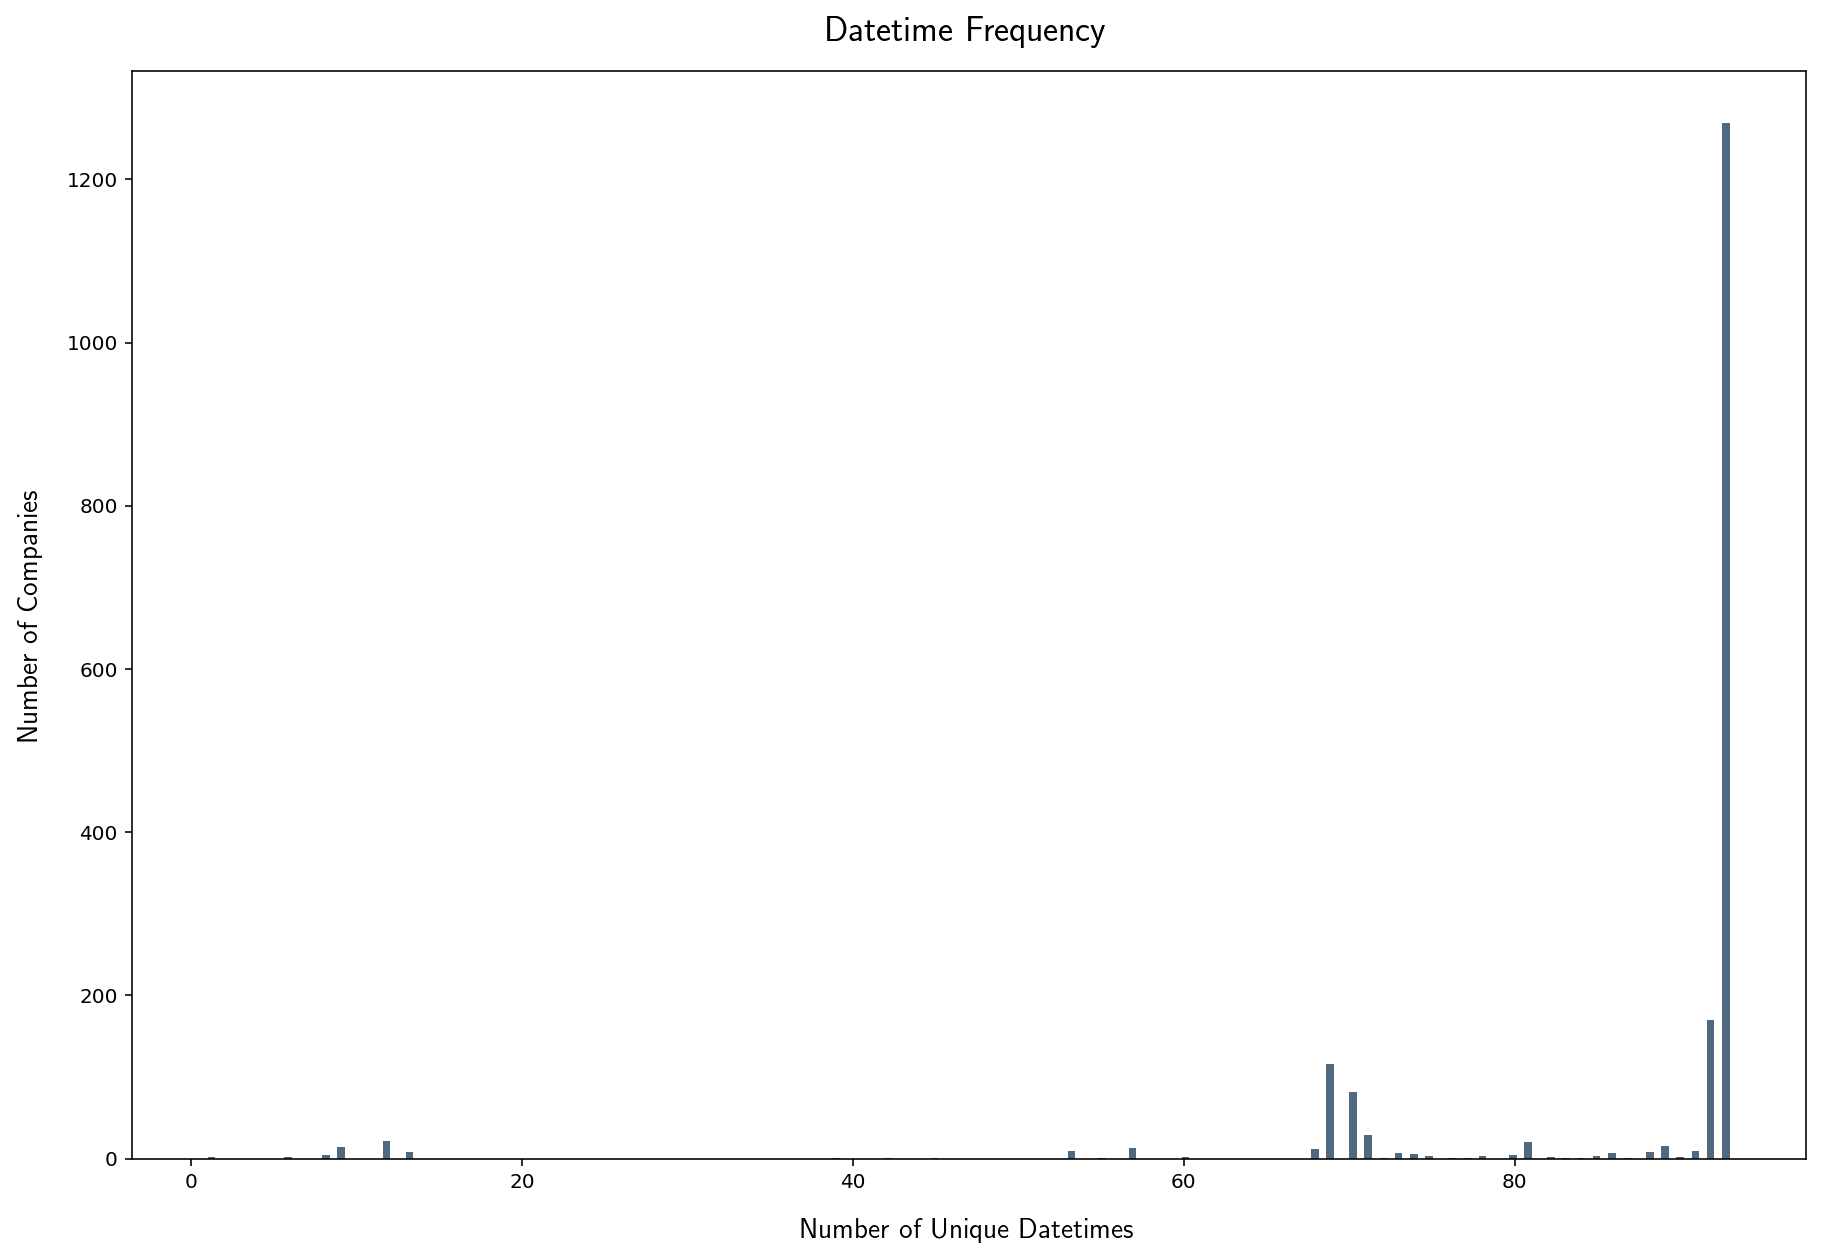

In [11]:
sizes = []
for name, group in grouped:
    sizes.append(group.shape[0])
    
plt.figure(figsize=(15, 10))
plt.hist(sizes, bins=200, color='#4f6980');
plt.xlabel('Number of Unique Datetimes', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Number of Companies', labelpad=12, fontsize=14, usetex=True);
plt.title('Datetime Frequency', pad=15, fontsize=18, usetex=True);

## Getting the Companies with 92+ Unique Update-Datetimes

In [12]:
datetimes = []
companies = []
for name, group in grouped:
    if group.shape[0] > 92:
        datetimes.append(group.Datetime.values)
        companies.append(name)
print(len(datetimes), 'companies with 92+ unique update-datetimes')

1269 companies with 92+ unique update-datetimes


## Getting the Datetimes Common to these Companies

In [13]:
datetimes = [set(l) for l in datetimes]
intersection = set.intersection(*datetimes)
print(len(intersection), 'datetime common to all these companies')

40 datetime common to all these companies


## Building a Time-Series Dataframe for the Companies

In [14]:
all_df = pd.DataFrame({})
for name, group in grouped:
    if name in companies:
        print('■', end='')
        group = group[group.Datetime.isin(intersection)]
        group['Datetime'] = group.Datetime.str.replace(r' - (\d):', r' - 0\1:')
        group['Datetime'] = pd.to_datetime(group.Datetime, format='%d %b %Y - %I:%M %p')
        group.index = group.Datetime
        group.drop(['CompanySymbol', 'OpenPrice', 'HighPrice', 'LowPrice', 'Datetime'], 
                   axis=1, inplace=True)
        col_names = all_df.columns.tolist()
        col_names.append(name)
        if all_df.shape == (0, 0):
            all_df = group
        else:
            all_df = all_df.join(group, how='outer')
        all_df.columns = col_names

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

In [15]:
print('Resulting dataframe shape:', all_df.shape)
print('Resulting dataframe head:')
display(all_df.head())
print(all_df.isna().sum().sum(), 'null values')

Resulting dataframe shape: (40, 1269)
Resulting dataframe head:


,DIALOG-C33,DIALOG-C35,DIALOG-C36,DIALOG-C37,DIALOG-C38,DIALOG-C39,DIALOG-C40,DIALOG-C41,DIGI,DIGI-C24,...,YTL,YTL-C22,YTLLAND,YTLPOWR,YTLPOWR-C5,YTLPOWR-C6,YTLREIT,ZECON,ZELAN,ZHULIAN
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-02-22 19:11:00,0.035,0.005,0.055,0.060,0.04,0.065,0.130,0.110,4.67,0.06,...,1.15,0.05,0.405,0.915,0.005,0.070,1.29,0.245,0.055,1.36
2019-02-25 19:11:00,0.035,0.005,0.055,0.065,0.04,0.070,0.135,0.115,4.71,0.06,...,1.14,0.05,0.405,0.905,0.005,0.070,1.29,0.250,0.055,1.36
2019-02-27 19:11:00,0.025,0.005,0.055,0.060,0.04,0.060,0.125,0.110,4.66,0.06,...,1.11,0.05,0.410,0.910,0.005,0.070,1.30,0.245,0.055,1.36
2019-02-28 19:11:00,0.025,0.005,0.055,0.050,0.04,0.055,0.125,0.110,4.55,0.05,...,1.06,0.05,0.410,0.890,0.005,0.060,1.29,0.225,0.055,1.37
2019-03-01 19:11:00,0.025,0.005,0.055,0.045,0.04,0.055,0.115,0.105,4.56,0.04,...,1.02,0.05,0.395,0.860,0.005,0.055,1.28,0.230,0.070,1.36


0 null values


In [16]:
all_df.sort_index(inplace=True)

## Plotting the Time Series of Some Company

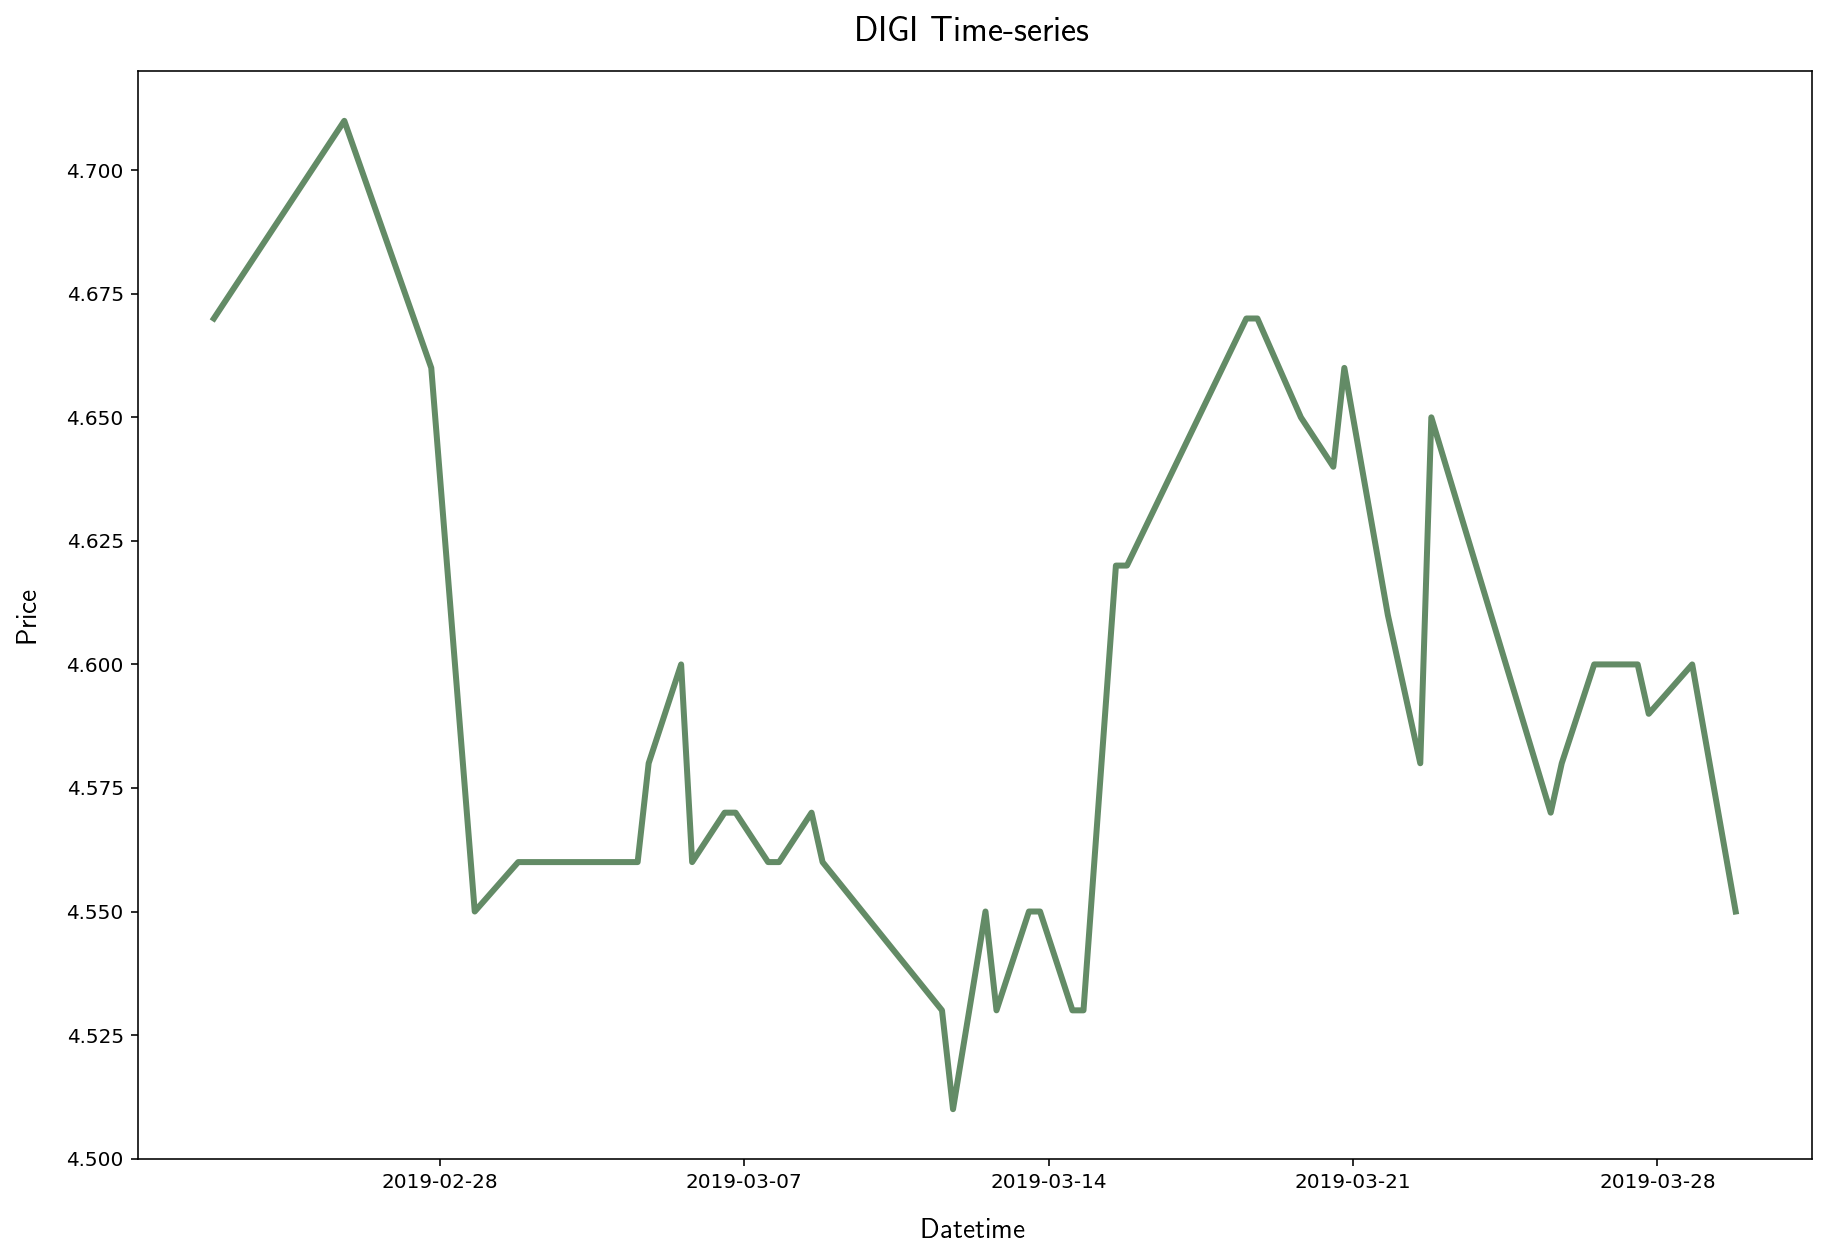

In [17]:
plt.figure(figsize=(15, 10))
plt.plot(all_df.DIGI, color='#638b66', linewidth=3);
plt.xlabel('Datetime', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('DIGI Time-series', pad=15, fontsize=18, usetex=True);

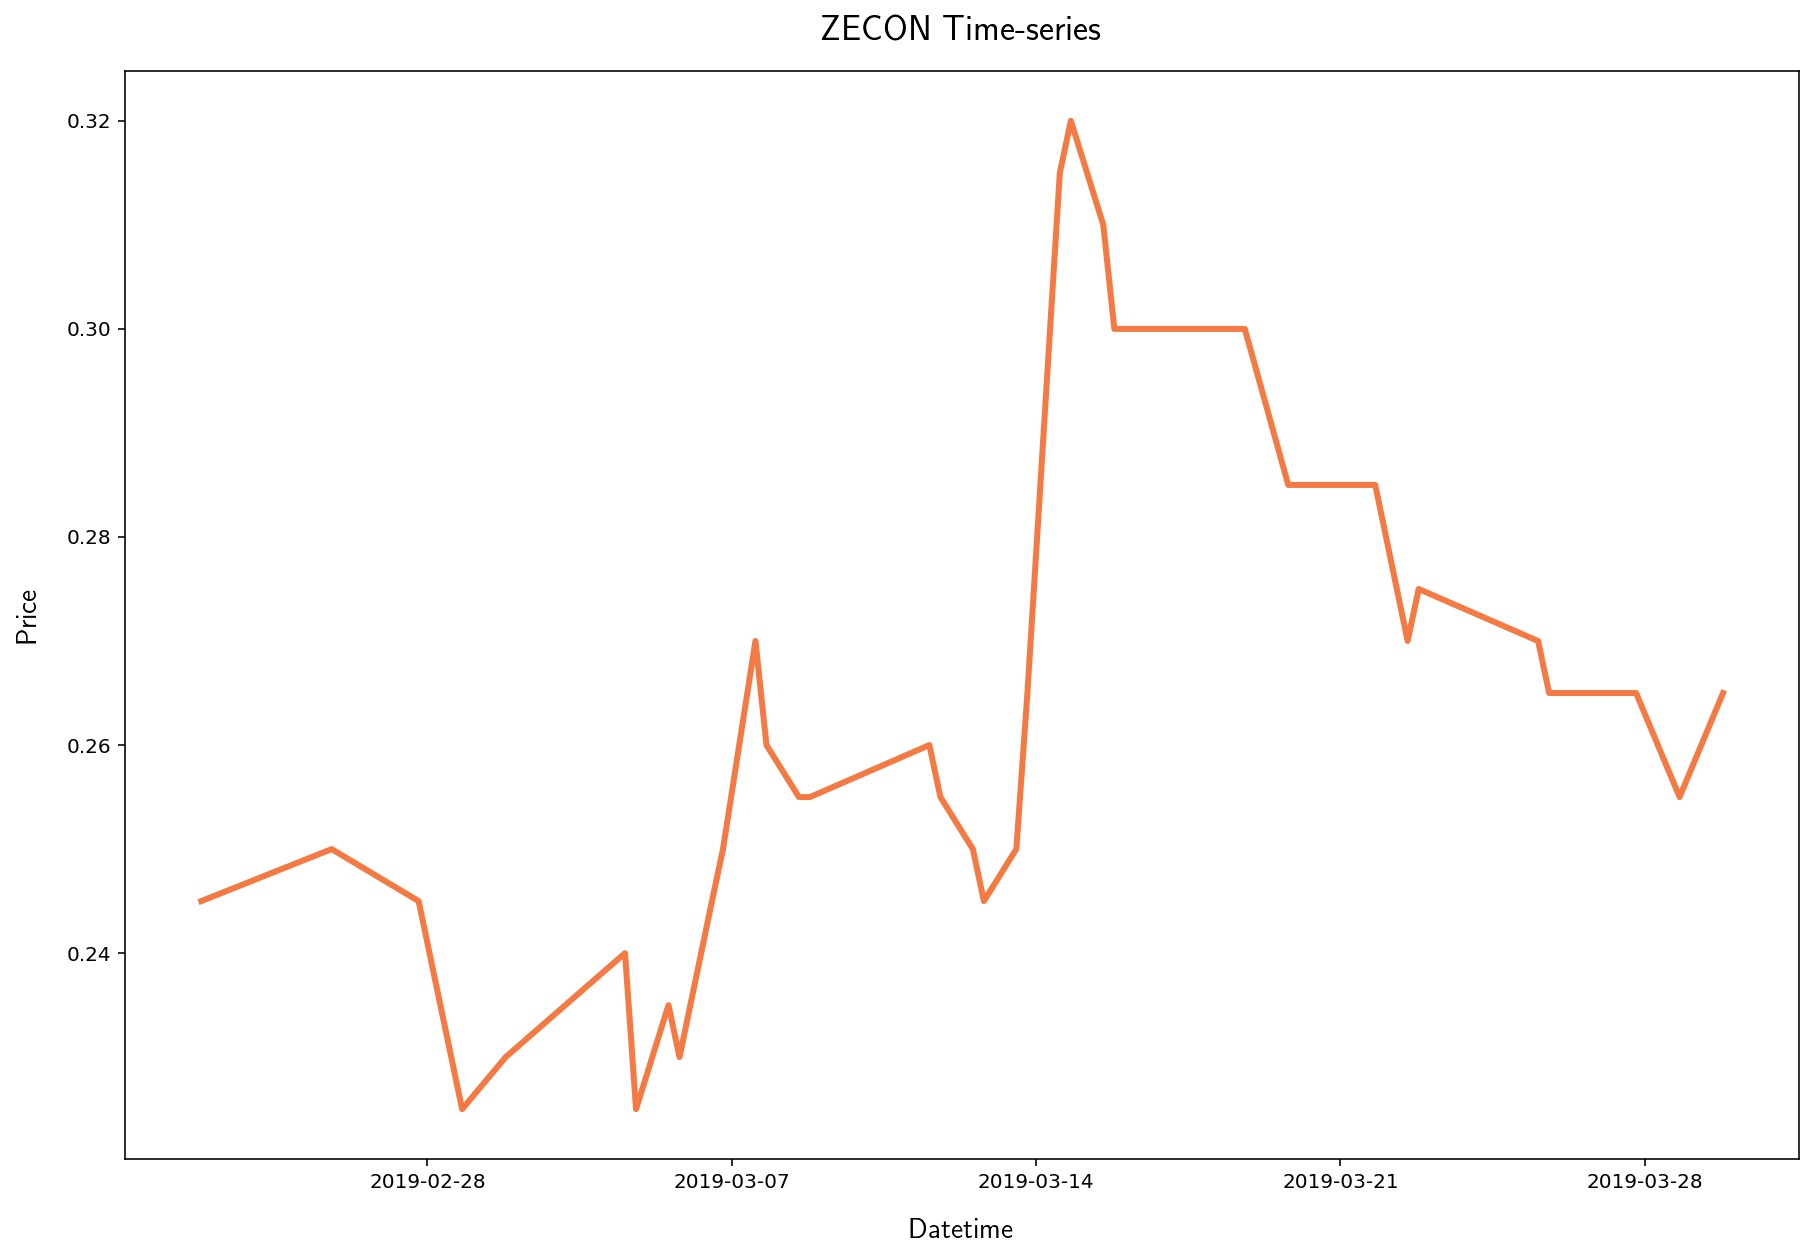

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(all_df.ZECON, color='#f47942', linewidth=3);
plt.xlabel('Datetime', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('ZECON Time-series', pad=15, fontsize=18, usetex=True);

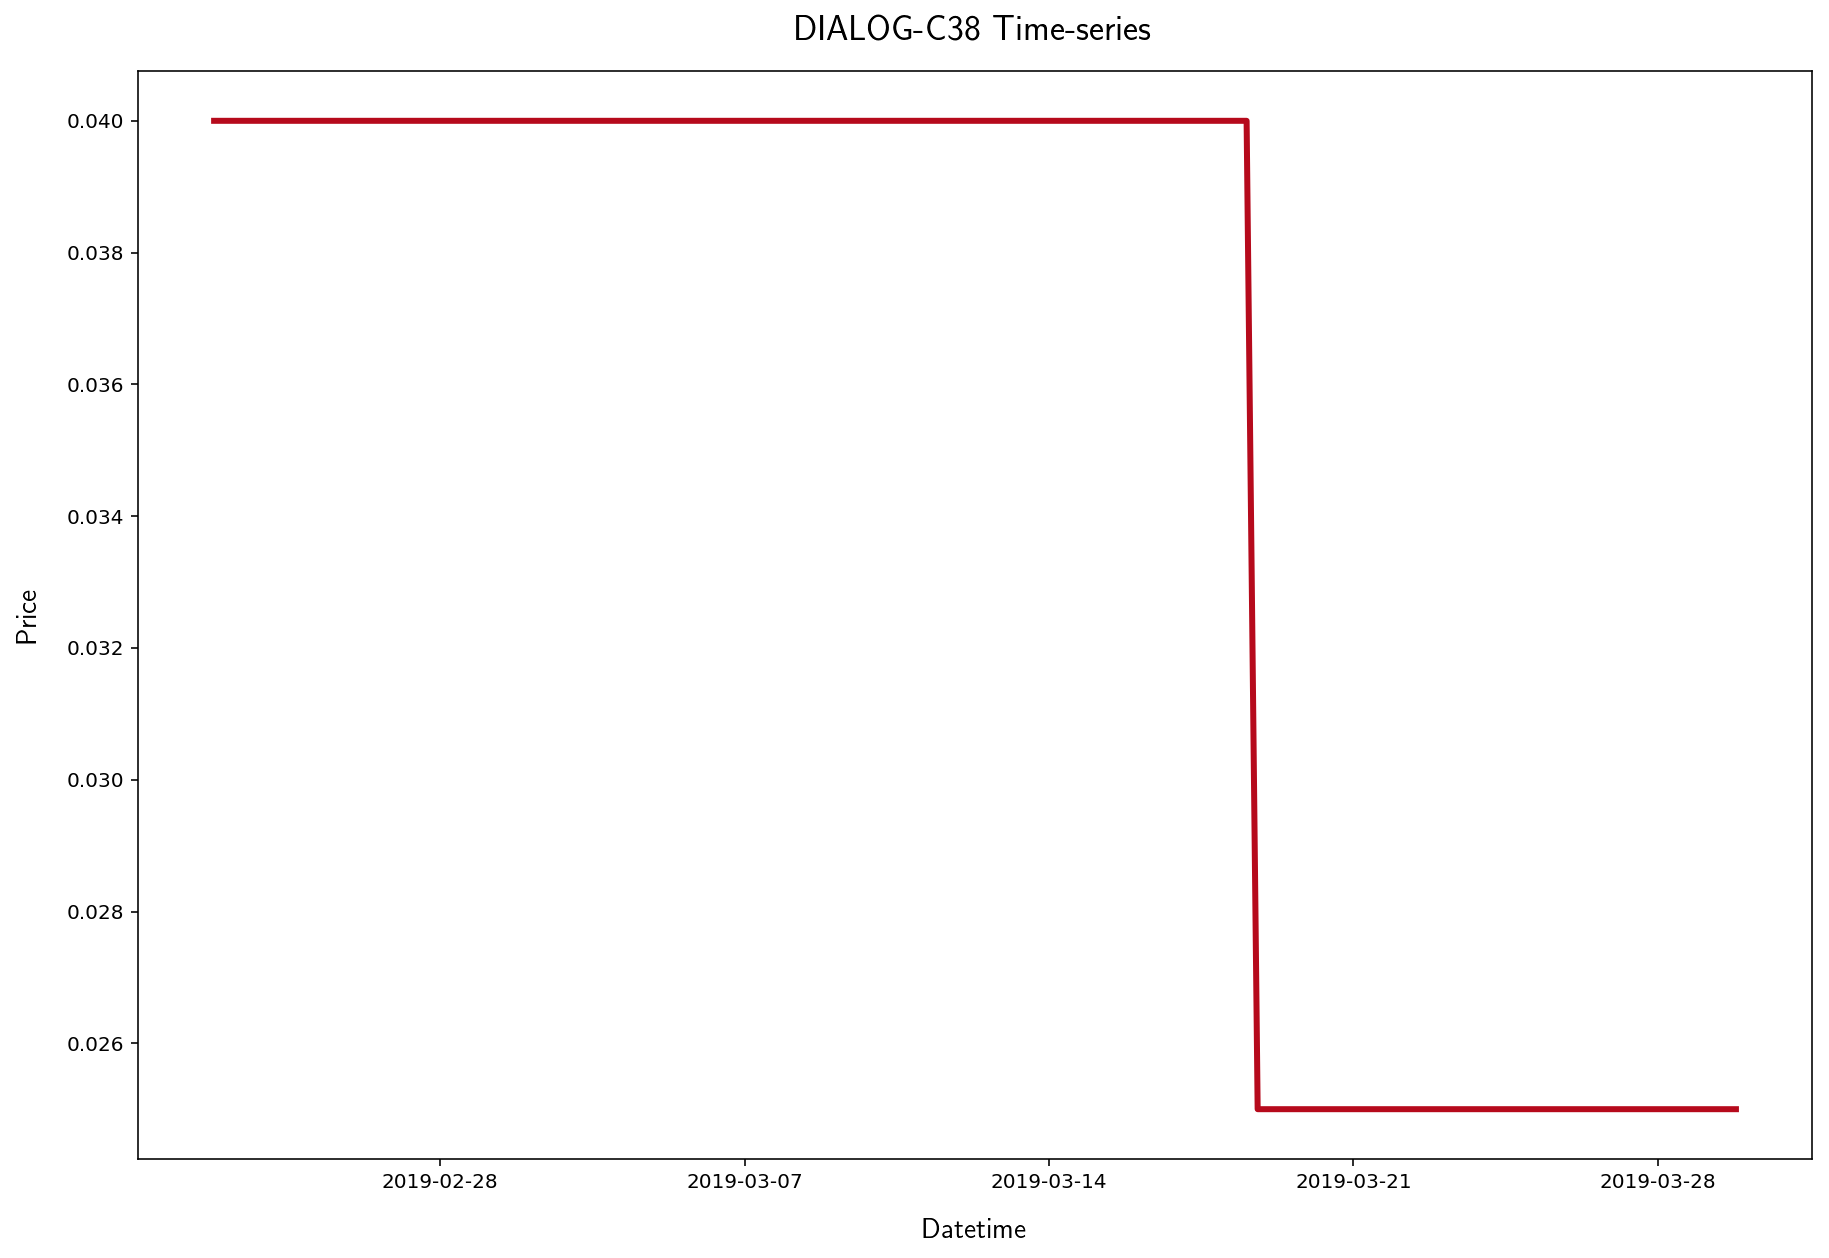

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(all_df['DIALOG-C38'], color='#b60a1c', linewidth=3);
plt.xlabel('Datetime', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('DIALOG-C38 Time-series', pad=15, fontsize=18, usetex=True);

## Calculating Covariance Between Company Prices
Covariance is a measure of how changes in one variable are associated with changes in a second variable. Specifically, covariance measures the degree to which two variables are linearly associated.
<br>
<img src='12.png' width=600px>

### Look at Covariance through a Heatmap

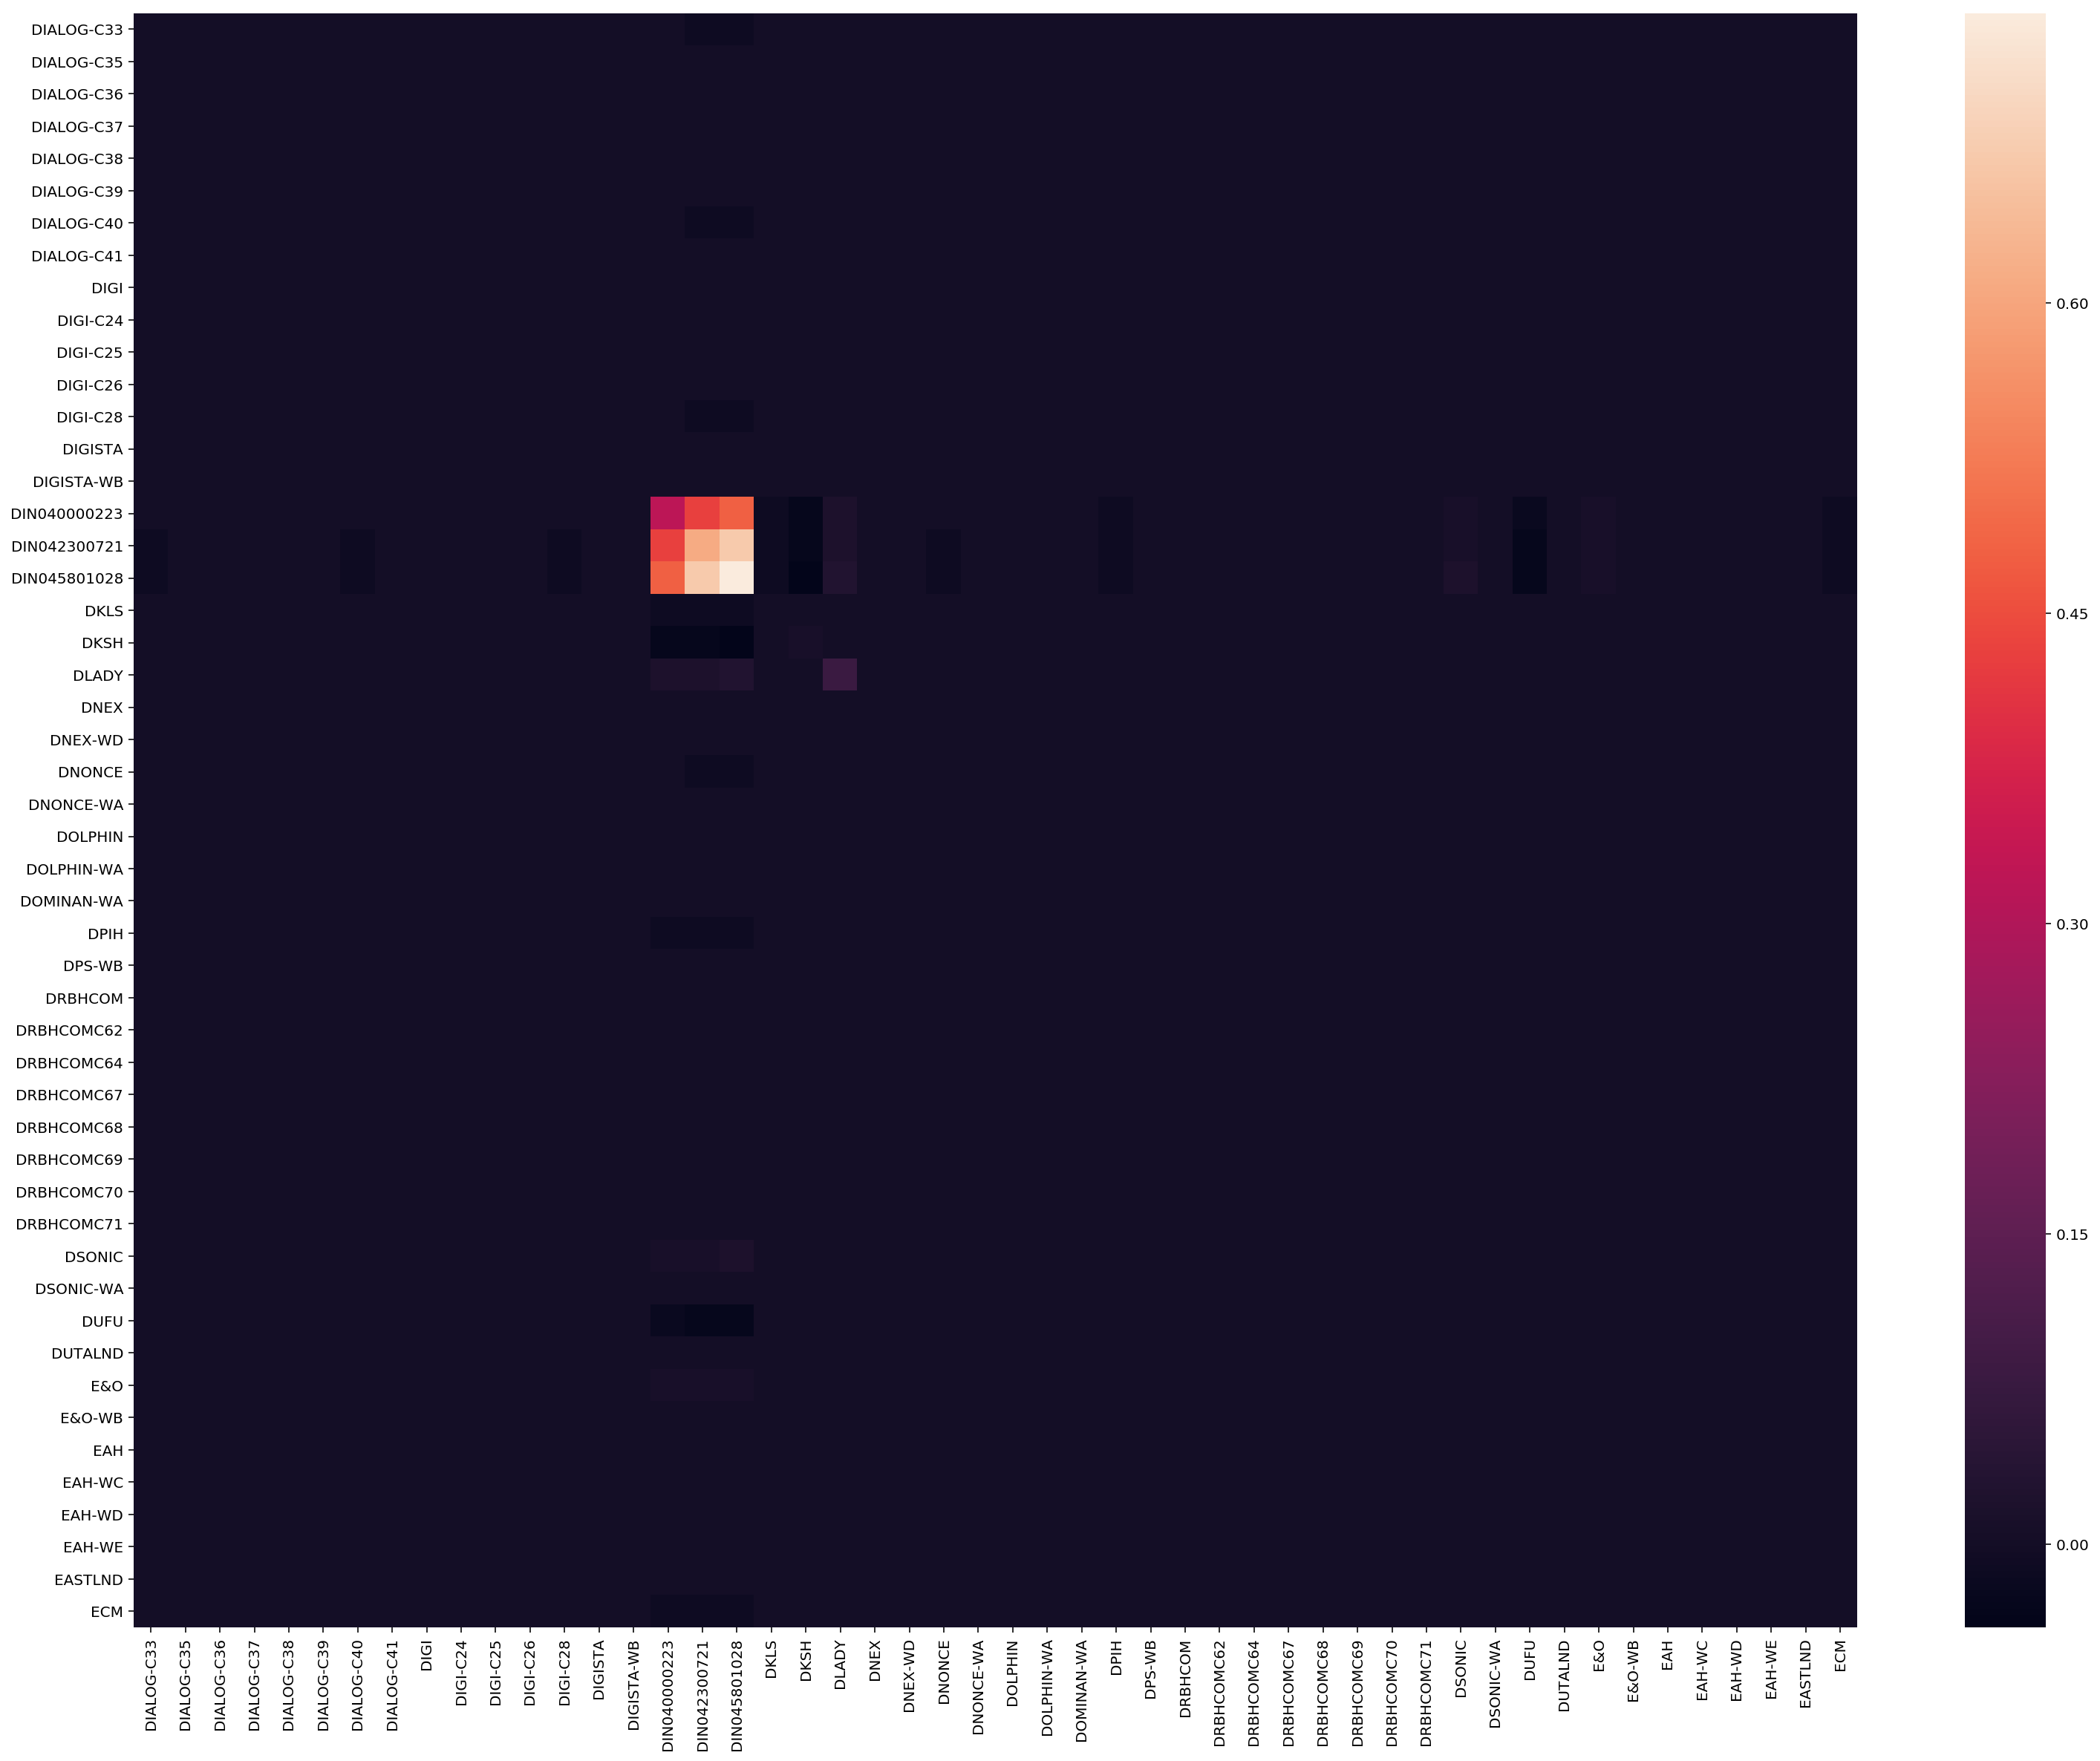

In [20]:
fig, ax = plt.subplots(figsize=(26,20))
sns.heatmap(all_df.iloc[:, 0:50].cov().round(2), ax=ax, xticklabels=True, yticklabels=True);

## The Distribution of Covariances

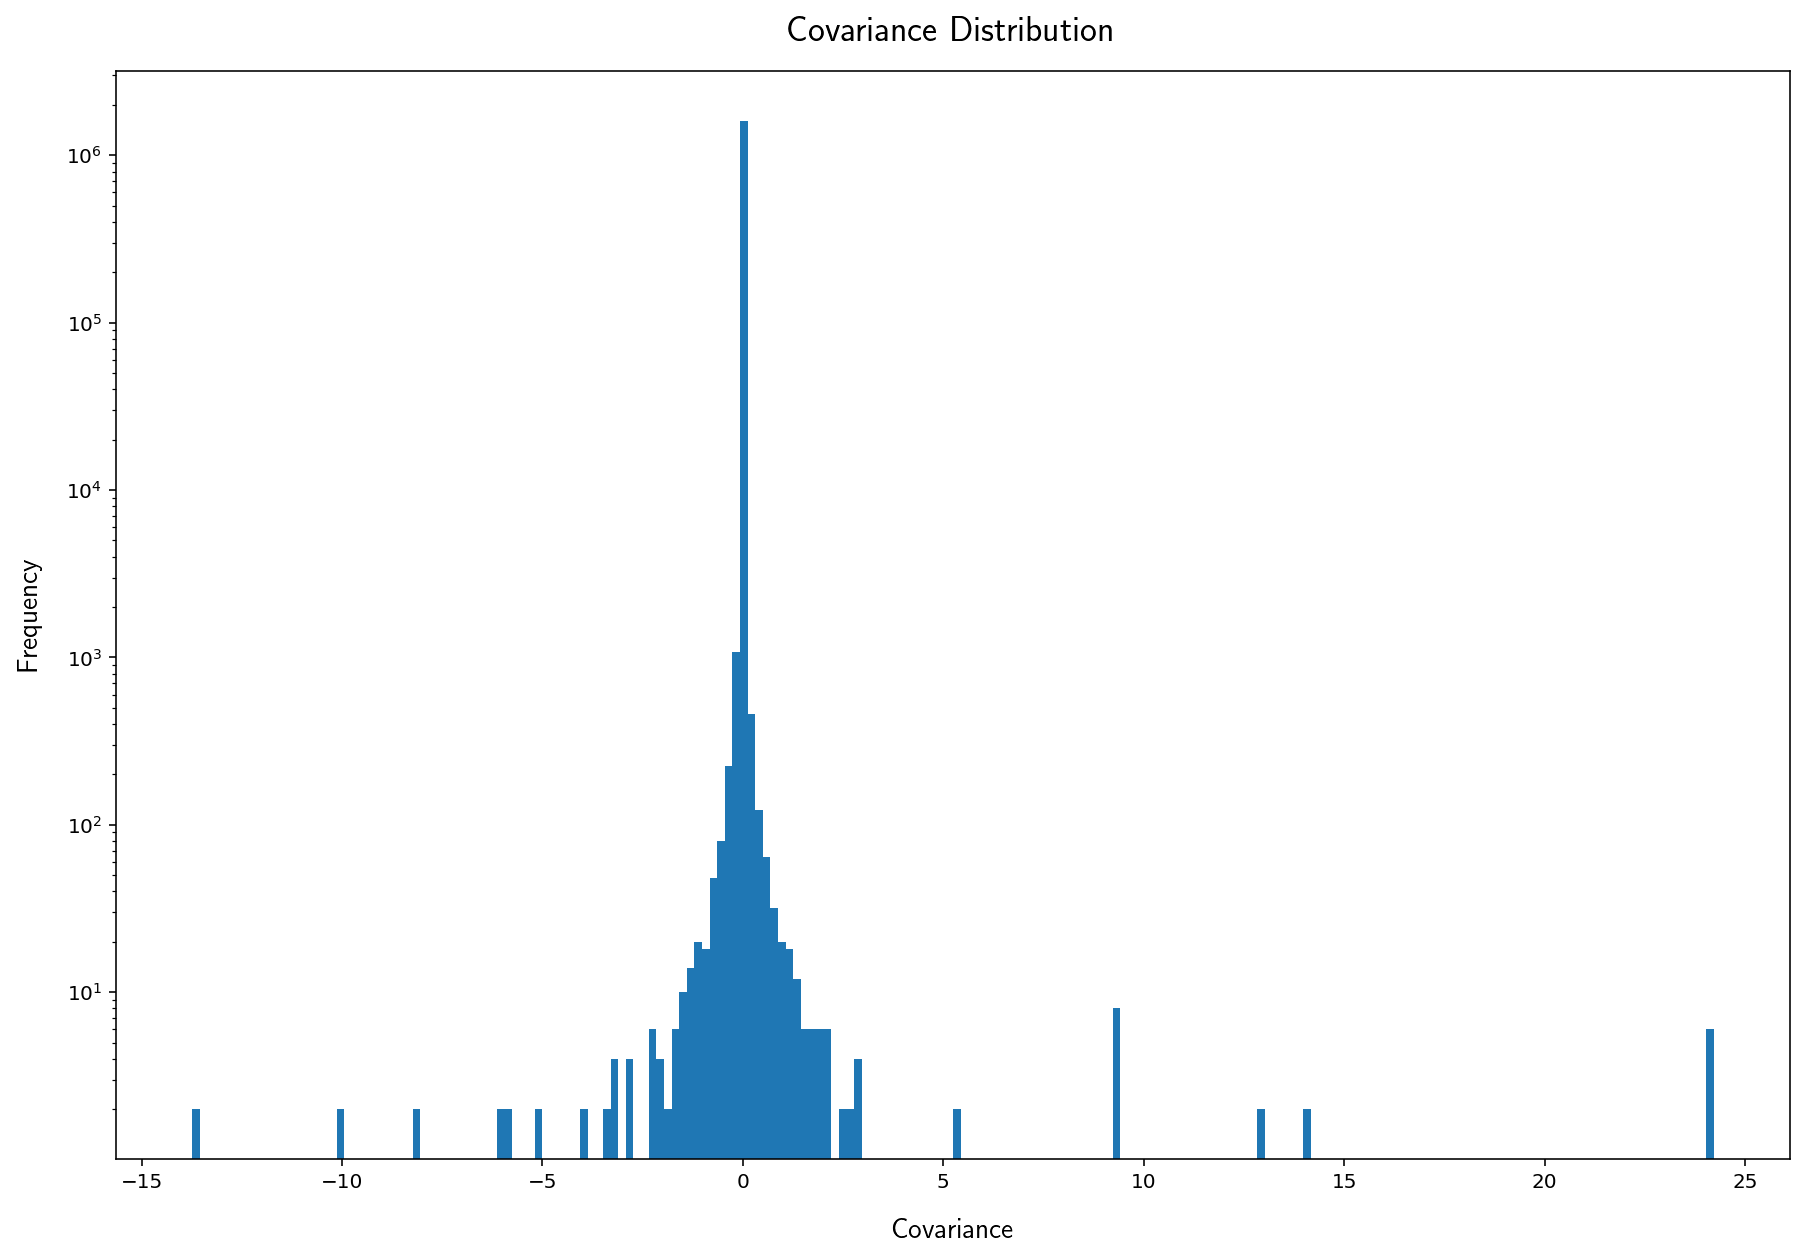

In [21]:
cov = all_df.cov()
cov_flat = cov.values.flatten()
cov_flat = np.delete(cov_flat, range(0, len(cov_flat), cov.shape[0]+1))
plt.figure(figsize=(15, 10))
plt.hist(cov_flat, bins=200, log=True, color='#1f77b4');
plt.xlabel('Covariance', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Frequency', labelpad=12, fontsize=14, usetex=True);
plt.title('Covariance Distribution', pad=15, fontsize=18, usetex=True);

## Finding Companies that Have High Covariance with Each Other

In [22]:
significant_cov = pd.DataFrame({'Company 1': [], 'Company 2': [], 'Covariance': []})
for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        if (cov.iat[i, j] > 2) and (i != j):
            significant_cov.loc[significant_cov.shape[0], :] = \
                (cov.index[i], cov.columns[j], cov.iat[i, j])
significant_cov.drop_duplicates(subset=['Covariance'], inplace=True)
significant_cov

,Company 1,Company 2,Covariance
0,DIN040000223,PANPAGE,9.284319
1,DIN042300721,PANPAGE,12.836191
2,DIN045801028,PANPAGE,14.148636
3,IHS046000824,PANPAGE,5.327548
4,LAFMSIA,PANPAGE,2.126155
5,MEDAINC-WA,PANPAGE,2.542864
6,MEDAINC-WB,PANPAGE,2.927265
7,MEDAINC-WC,PANPAGE,2.910386
16,PANPAGE,PMETAL,2.019041
17,PANPAGE,TATGIAP,24.087106


## Plotting Prices Time-Series for Companies with High Covariance

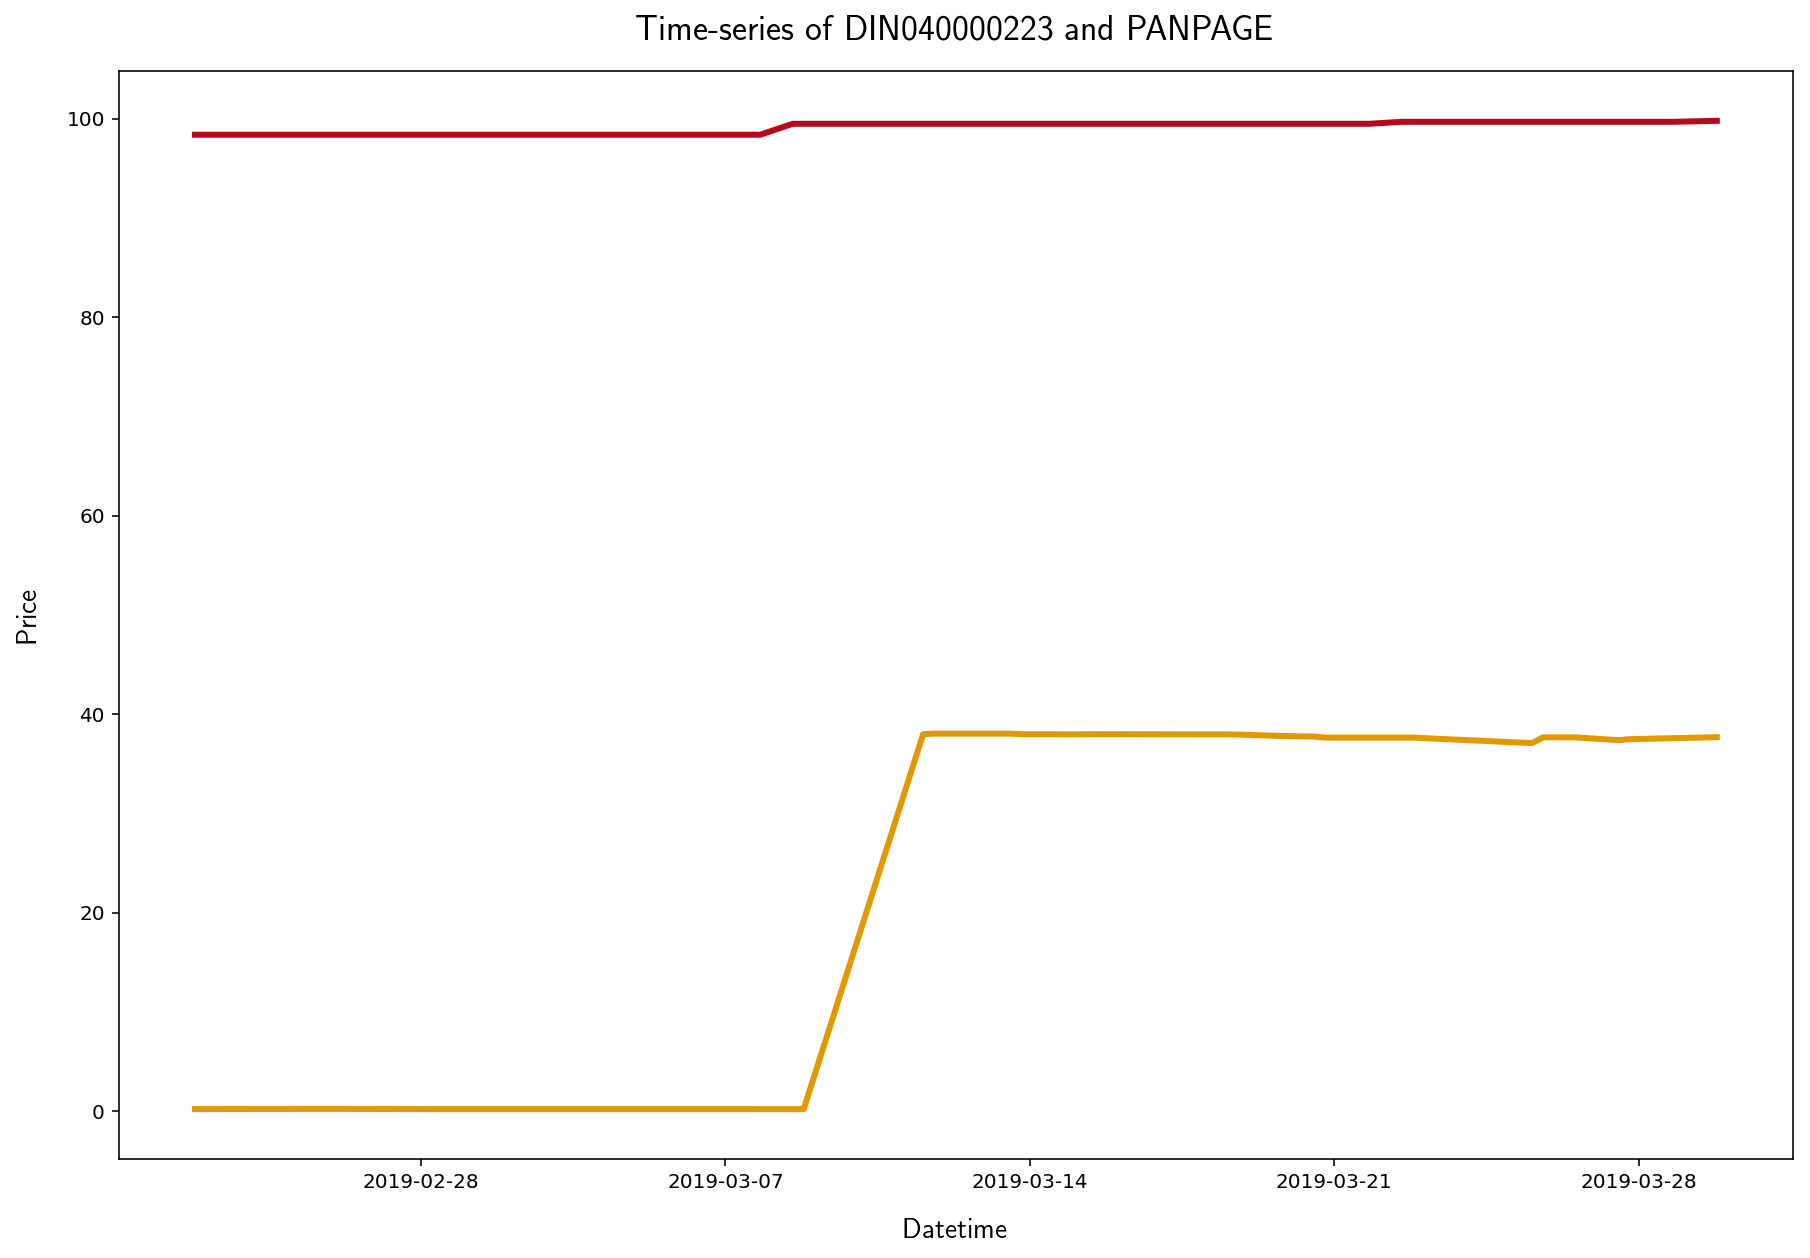

In [23]:
plt.figure(figsize=(15, 10))
plt.xlabel('Datetime', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('Time-series of DIN040000223 and PANPAGE', pad=15, fontsize=18, usetex=True);
plt.plot(all_df.DIN040000223, color='#b60a1c', linewidth=3);
plt.plot(all_df.PANPAGE, color='#e39802', linewidth=3);

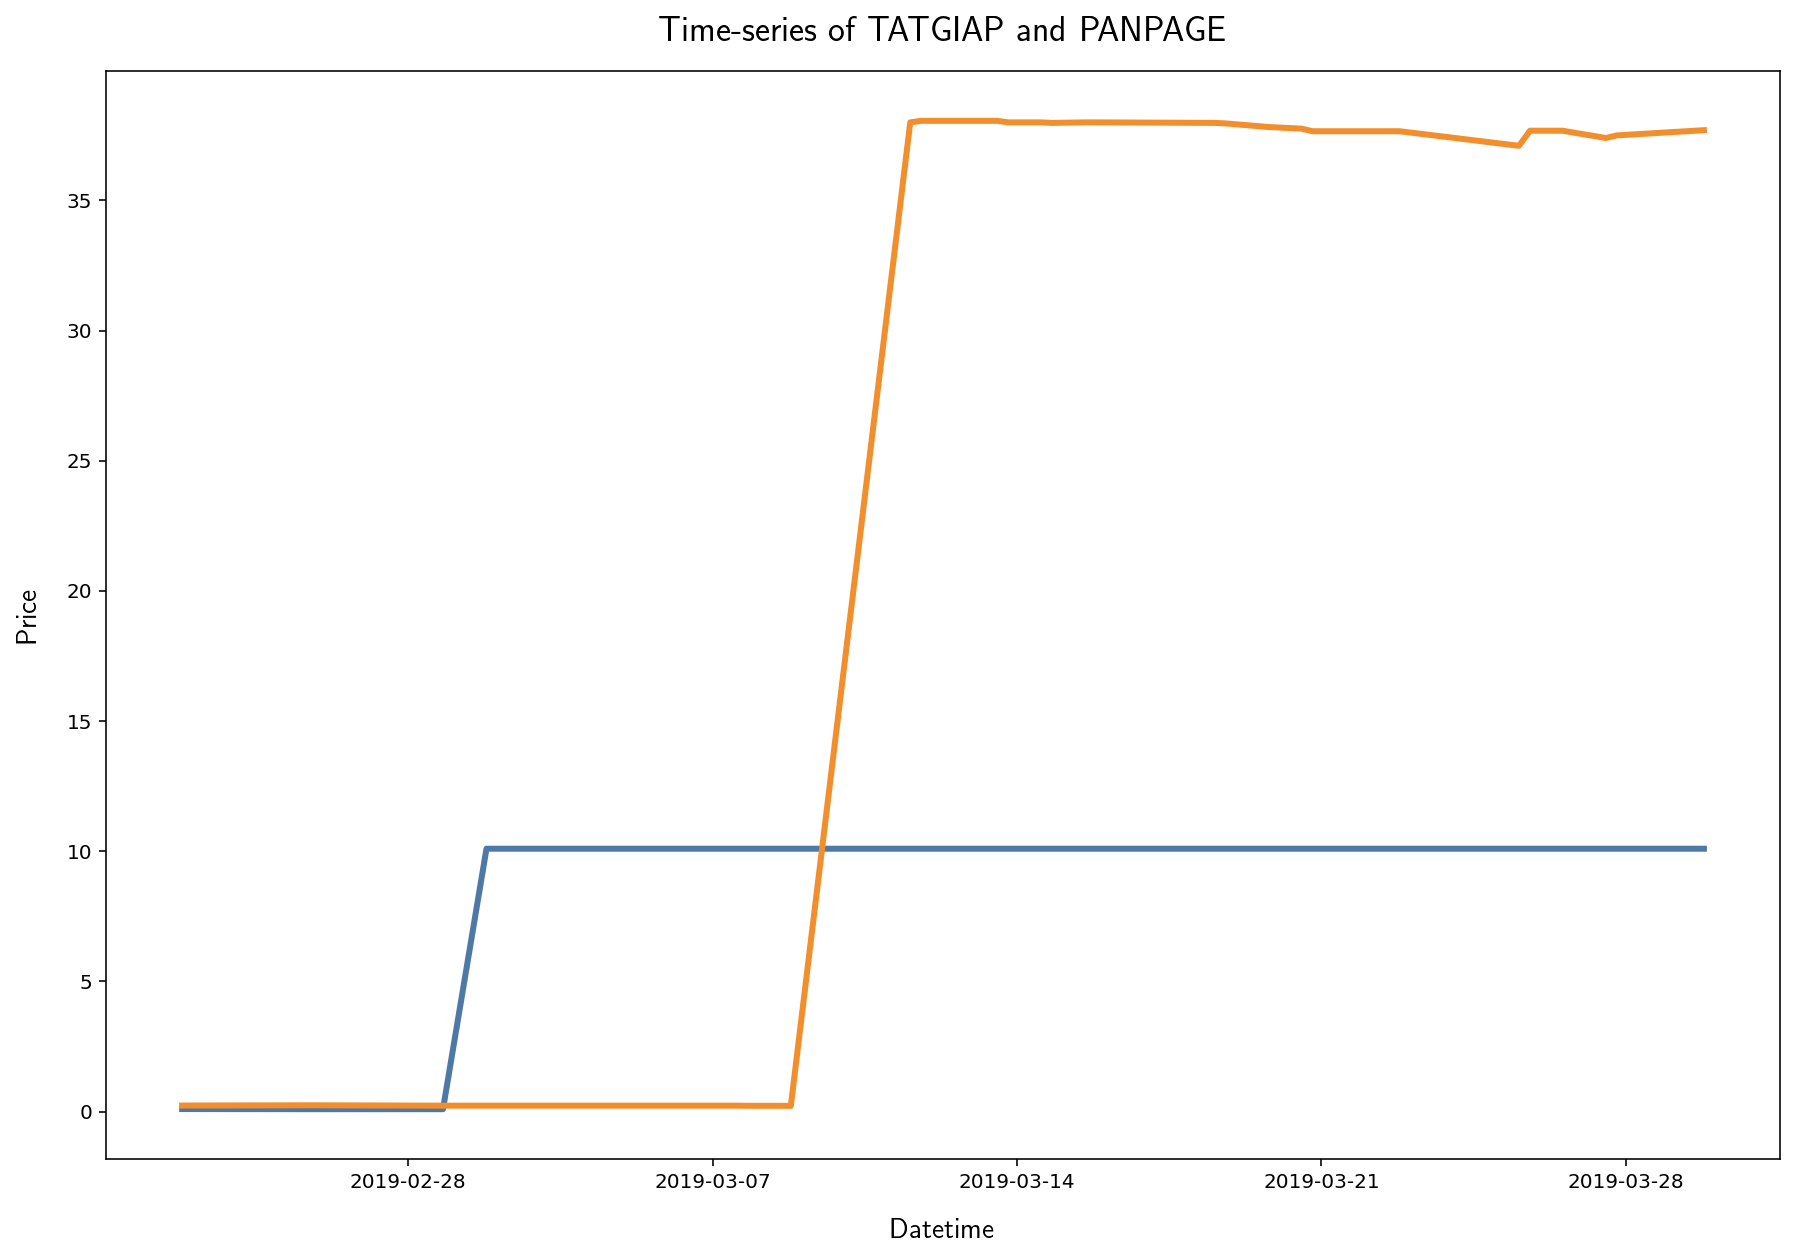

In [24]:
plt.figure(figsize=(15, 10))
plt.xlabel('Datetime', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('Time-series of TATGIAP and PANPAGE', pad=15, fontsize=18, usetex=True);
plt.plot(all_df.TATGIAP, color='#4E79A7', linewidth=3);
plt.plot(all_df.PANPAGE, color='#F28E2B', linewidth=3);

## Finding Companies with Negative Covariance

In [25]:
neg_cov = pd.DataFrame({'Company 1': [], 'Company 2': [], 'Covariance': []})
for i in range(cov.shape[0]):
    print('■', end='')
    for j in range(cov.shape[1]):
        if (cov.iat[i, j] < -3) and (i != j):
            neg_cov.loc[neg_cov.shape[0], :] = \
                (cov.index[i], cov.columns[j], cov.iat[i, j])
neg_cov.drop_duplicates(subset=['Covariance'], inplace=True)
neg_cov

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

,Company 1,Company 2,Covariance
0,F&N,PANPAGE,-3.950930
1,HARTA,PANPAGE,-3.419719
2,HLBANK,PANPAGE,-5.984174
3,HLFG,PANPAGE,-3.239975
4,KESM,PANPAGE,-8.158738
5,NESTLE,PANPAGE,-10.073214
12,PANPAGE,PBBANK,-5.916555
13,PANPAGE,PETDAG,-13.738677
14,PANPAGE,SAM,-3.185408
15,PANPAGE,SGB,-5.092184


## Plotting Prices Time-Series for Companies with Negative Covariance

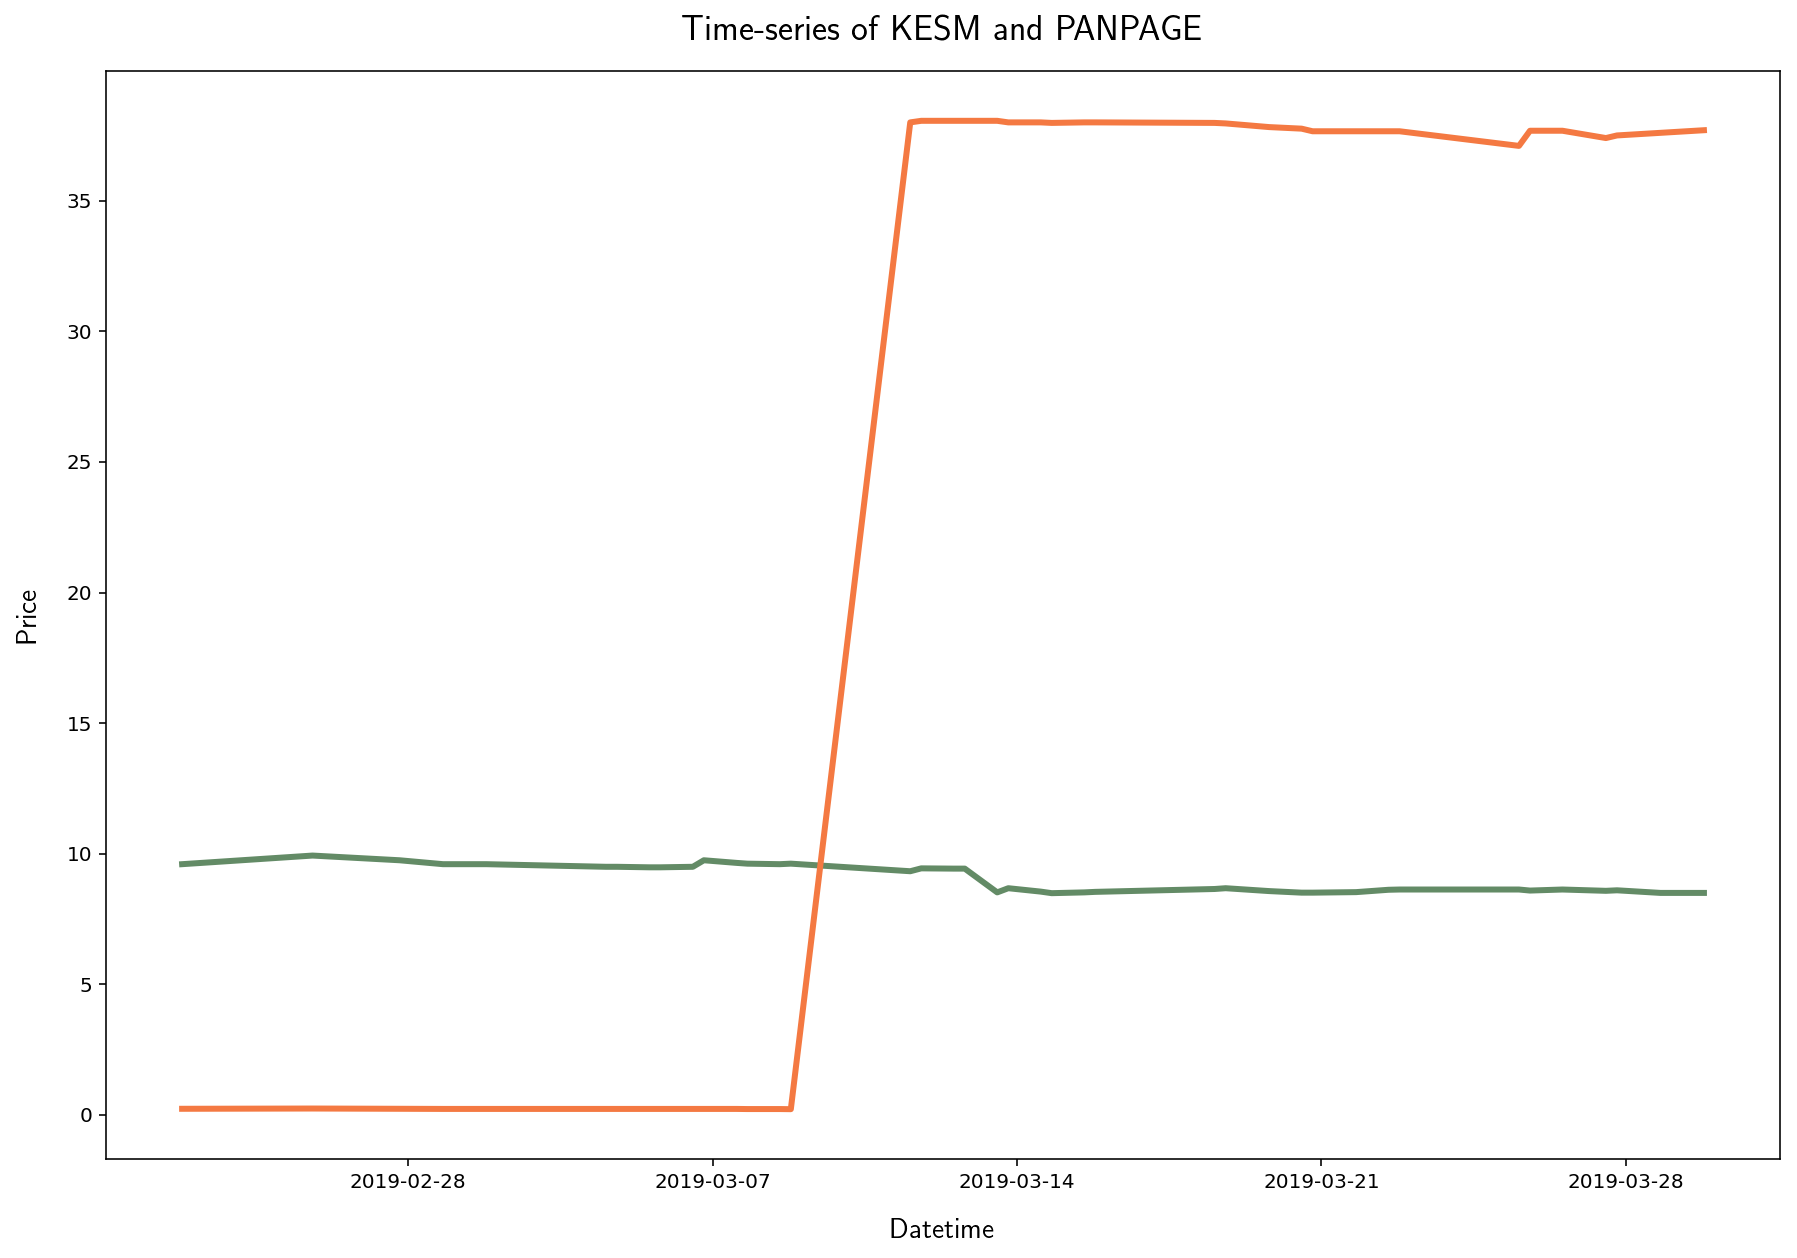

In [26]:
plt.figure(figsize=(15, 10))
plt.xlabel('Datetime', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('Time-series of KESM and PANPAGE', pad=15, fontsize=18, usetex=True);
plt.plot(all_df.KESM, color='#638b66', linewidth=3);
plt.plot(all_df.PANPAGE, color='#f47942', linewidth=3);

## Calculating Correlation Between Company Prices
The **problem with covariances** is that they are **hard to compare**: when you calculate the covariance of a set of heights and weights, as expressed in meters and kilograms, you will get a different covariance from when you do it in other units (for example in feet and pounds).
The solution to this is to **'normalize'** the covariance: you divide the covariance by something that represents the diversity and scale in both the covariates, and end up with a value that is assured to be **between -1 and 1**: the **correlation**. Whatever unit your original variables were in, you will always get the same result, and this will also ensure that you can, to a certain degree, compare whether two variables 'correlate' more than two others, simply by comparing their correlation.
[Source](https://stats.stackexchange.com/questions/18082/how-would-you-explain-the-difference-between-correlation-and-covariance)

### Look at Covariance through a Heatmap

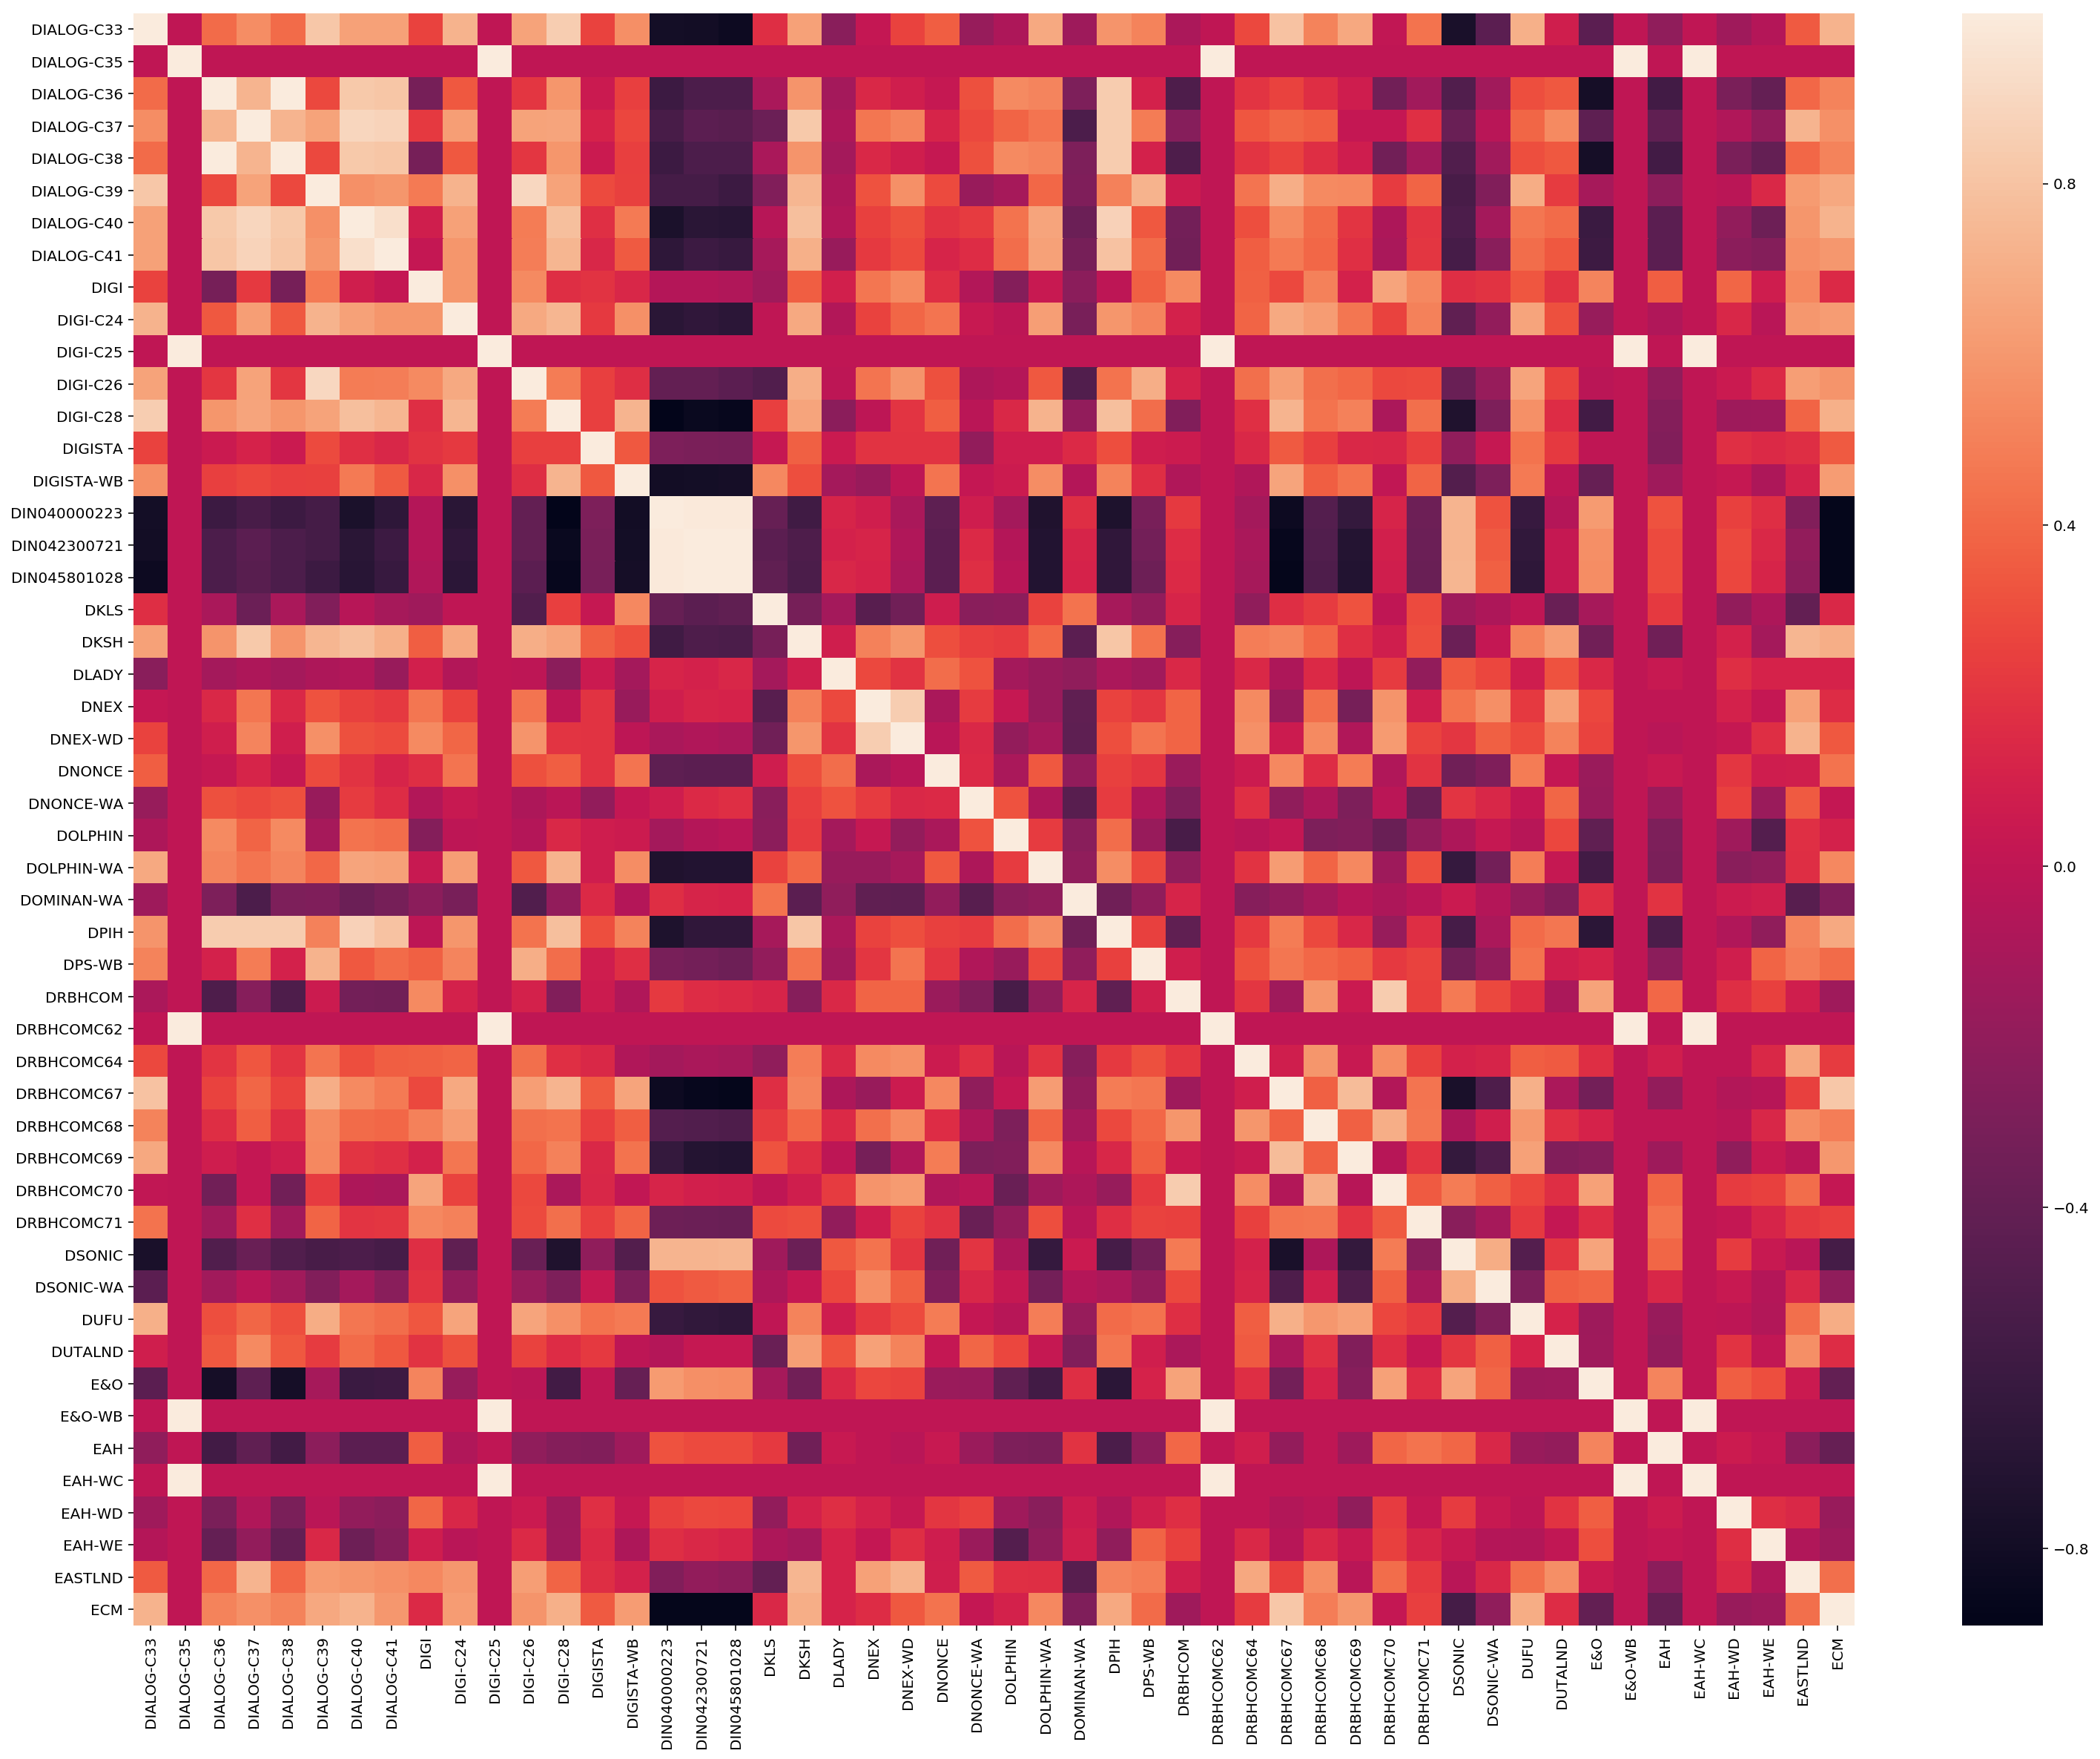

In [27]:
fig, ax = plt.subplots(figsize=(26,20))
sns.heatmap(all_df.iloc[:, 0:50].corr().round(2), ax=ax, xticklabels=True, yticklabels=True);

## The Distribution of Correlations

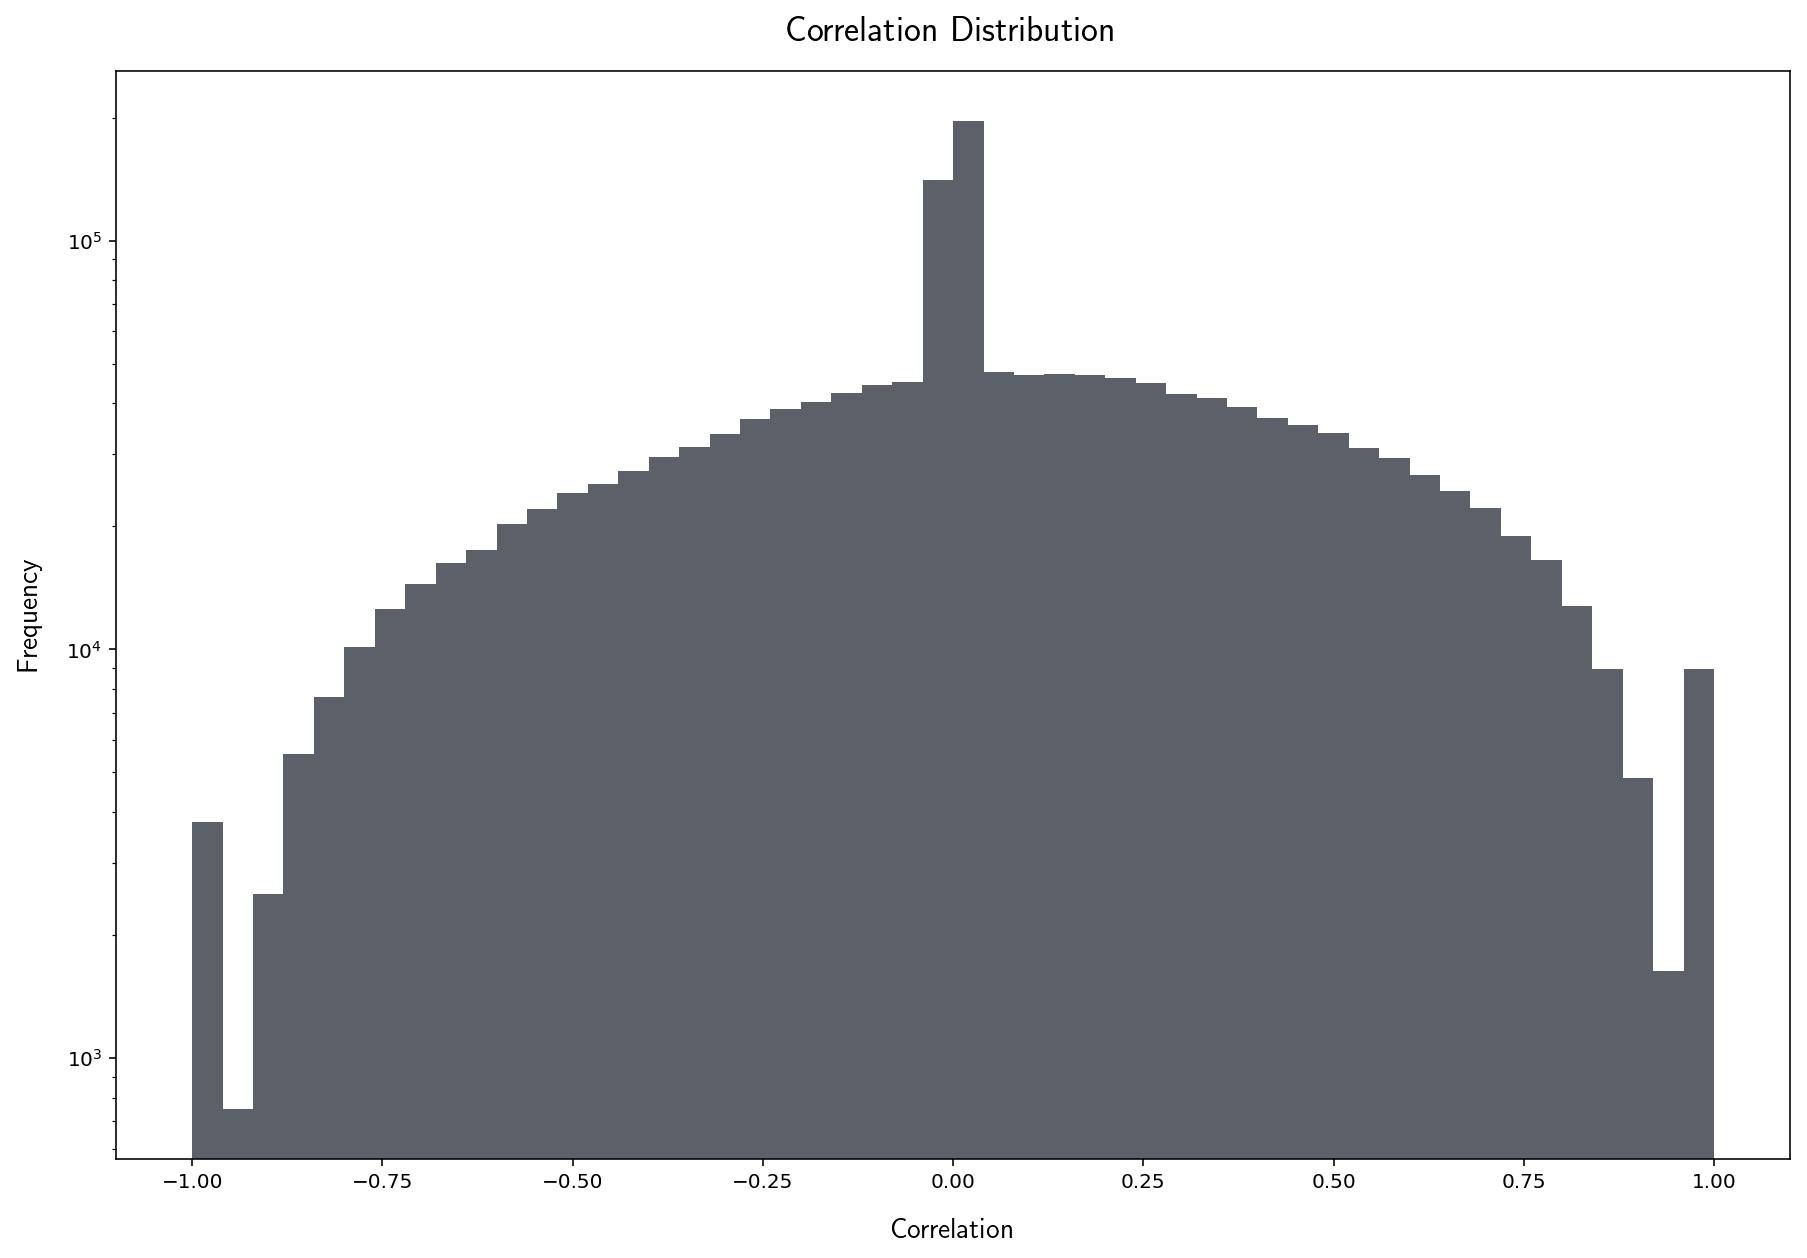

In [28]:
corr = all_df.corr()
corr.fillna(value=-9999, inplace=True)
corr_flat = corr.values.flatten()
corr_flat = corr_flat[corr_flat != -9999]
corr_flat = np.delete(corr_flat, range(0, len(corr_flat), corr.shape[0]+1))
plt.figure(figsize=(15, 10))
plt.xlabel('Correlation', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Frequency', labelpad=12, fontsize=14, usetex=True);
plt.title('Correlation Distribution', pad=15, fontsize=18, usetex=True);
plt.hist(corr_flat, bins=50, log=True, color='#5c6068');

## Finding Companies with High Positive Correlation

In [29]:
_comp_1 = []; _comp_2 = []; _corrs = []
for i in range(corr.shape[0]):
    print('■', end='')
    for j in range(corr.shape[1]):
        cr = corr.iat[i, j]
        if (cr > 0.7) and (i != j):
            _comp_1.append(corr.index[i])
            _comp_2.append(corr.columns[j])
            _corrs.append(cr)
significant_corr = pd.DataFrame({'Company 1': _comp_1, 'Company 2': _comp_2, 'Correlation': _corrs})
significant_corr.drop_duplicates(subset=['Correlation'], inplace=True)
significant_corr.sort_values('Correlation', ascending=False).head(20)

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

,Company 1,Company 2,Correlation
14170,GENTINGC56,WCT-C15,1.000000
17754,HARTA-C17,MHB-C13,1.000000
244,DIALOG-C36,DIALOG-C38,1.000000
578,DIALOG-C38,HAPSENG-CX,1.000000
273,DIALOG-C36,HAPSENG-CX,1.000000
161,DIALOG-C35,DIGI-C25,1.000000
42937,MTOUCHE-WB,PJBUMI-WA,1.000000
43600,MYCRON-WA,SEEHUP,1.000000
1438,DIGI-C26,SIMEPROP-CJ,1.000000
1434,DIGI-C26,SIME-C27,1.000000


## Plotting Prices Time-Series for Companies with High Positive Correlation

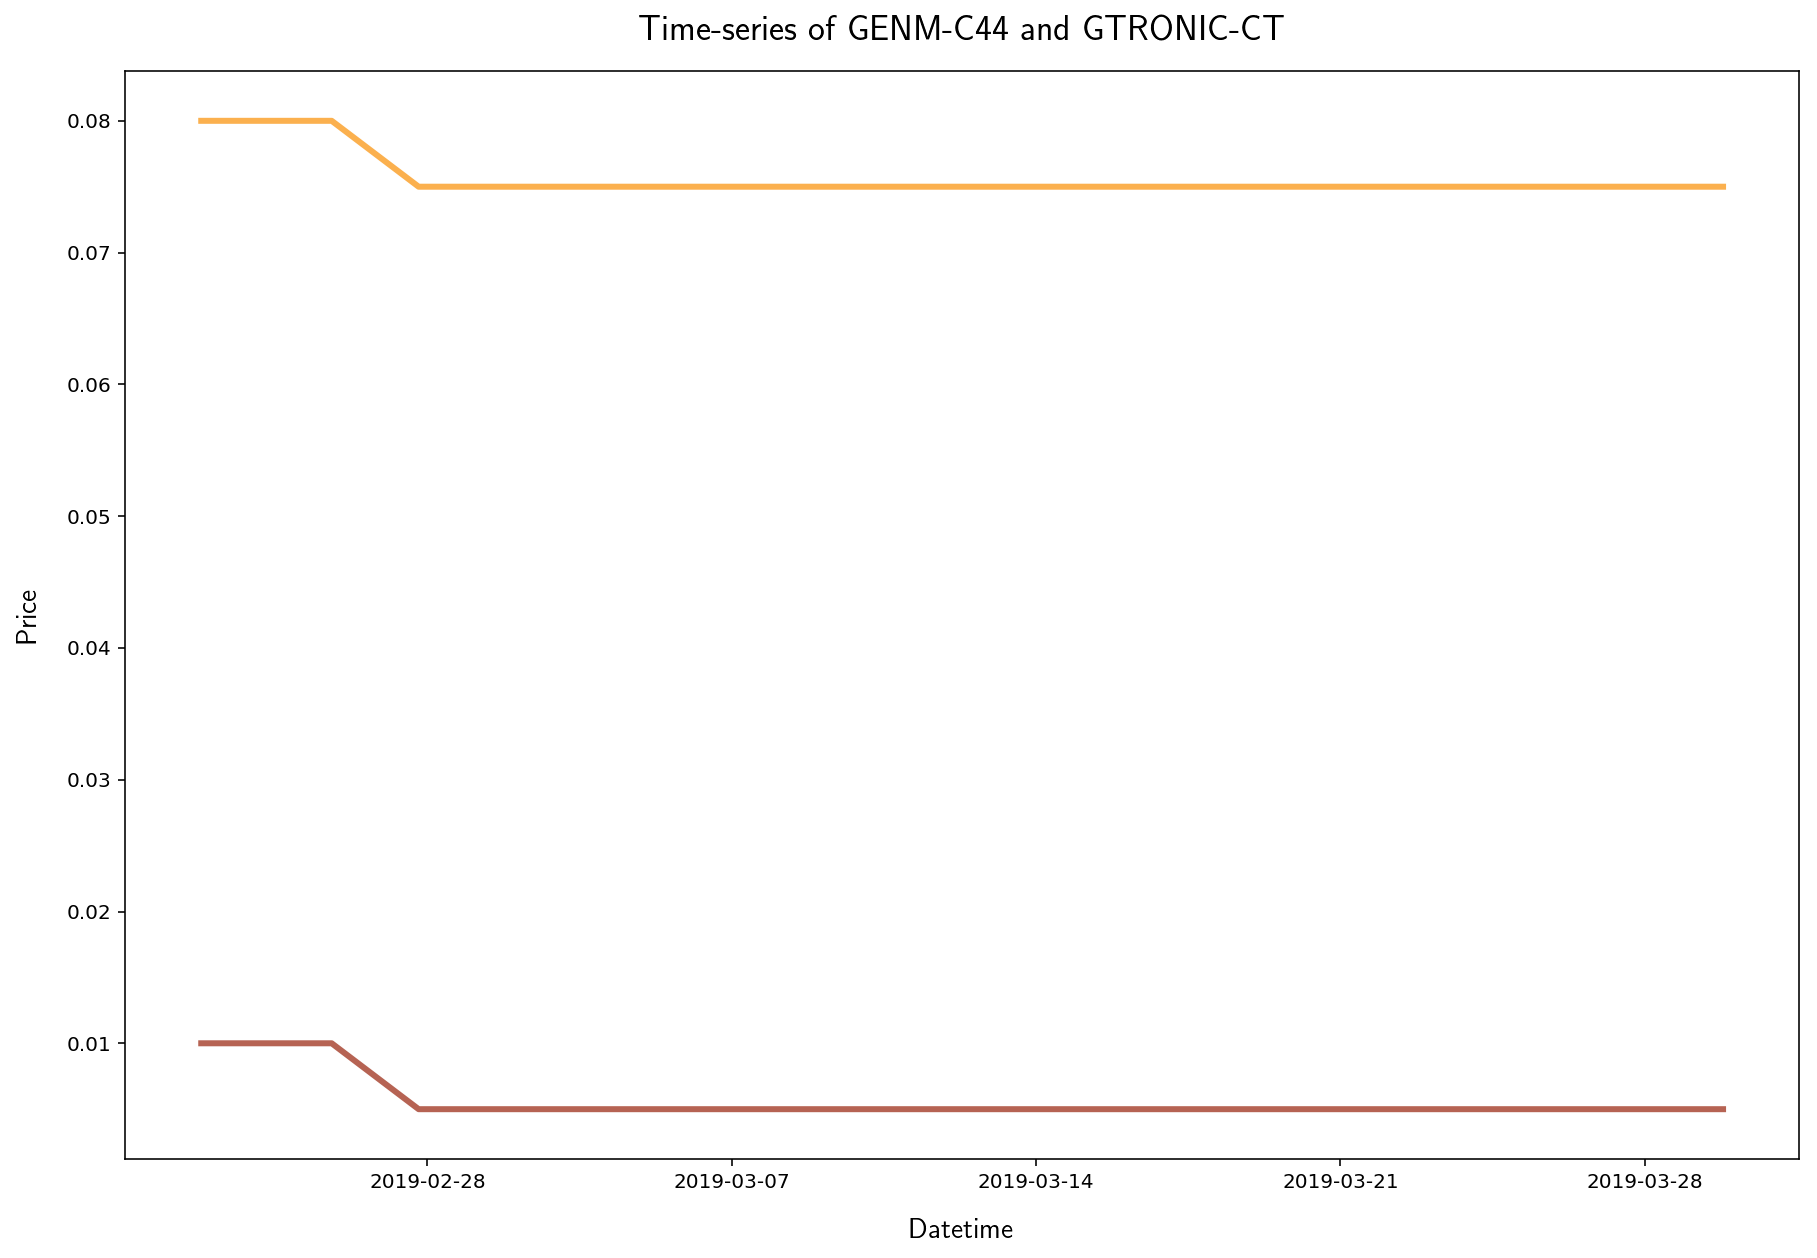

In [30]:
plt.figure(figsize=(15, 10))
plt.xlabel('Datetime', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('Time-series of GENM-C44 and GTRONIC-CT', pad=15, fontsize=18, usetex=True);
plt.plot(all_df['GENM-C44'], color='#fbb04e', linewidth=3);
plt.plot(all_df['GTRONIC-CT'], color='#b66353', linewidth=3);

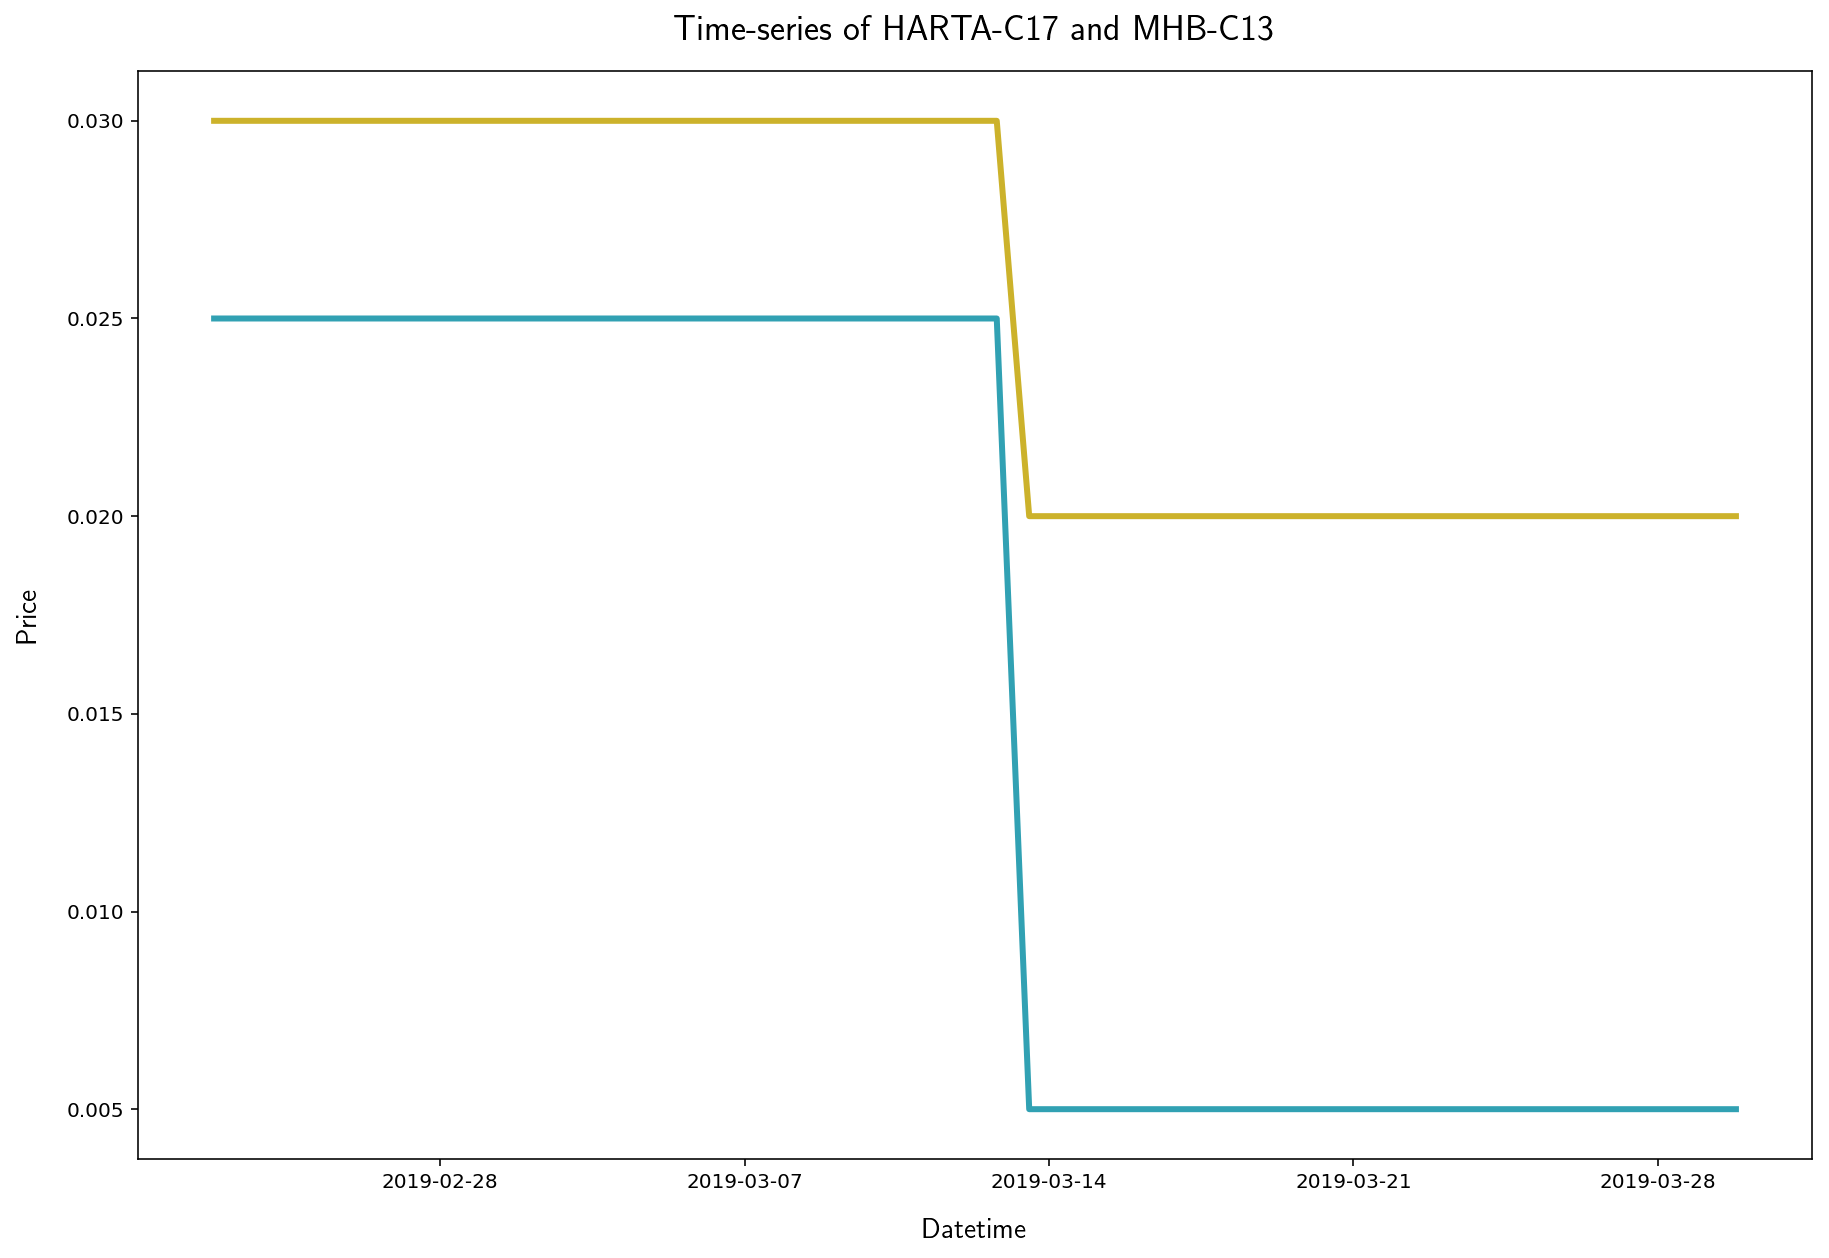

In [31]:
plt.figure(figsize=(15, 10))
plt.xlabel('Datetime', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('Time-series of HARTA-C17 and MHB-C13', pad=15, fontsize=18, usetex=True);
plt.plot(all_df['HARTA-C17'], color='#31a1b3', linewidth=3);
plt.plot(all_df['MHB-C13'], color='#ccb22b', linewidth=3);

## Finding Companies with High Negative Correlation

In [32]:
_comp_1 = []; _comp_2 = []; _corrs = []
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        cr = corr.iat[i, j]
        if (cr < -0.7) and (cr > -1.1) and (i != j):
            _comp_1.append(corr.index[i])
            _comp_2.append(corr.columns[j])
            _corrs.append(cr)
significant_corr = pd.DataFrame({'Company 1': _comp_1, 'Company 2': _comp_2, 'Correlation': _corrs})
significant_corr.drop_duplicates(subset=['Correlation'], inplace=True)
significant_corr.sort_values('Correlation').head(20)

,Company 1,Company 2,Correlation
7919,GENTINGC56,TATGIAP-WA,-1.000000
43913,TATGIAP-WA,WCT-C15,-1.000000
800,DIN042300721,INARI-C21,-1.000000
79,DIALOG-C35,ECOWLD-CS,-1.000000
7557,GENM-C44,MISC-C21,-1.000000
43810,TATGIAP-PA,WCT-C15,-1.000000
7918,GENTINGC56,TATGIAP-PA,-1.000000
7917,GENTINGC56,TATGIAP,-1.000000
43707,TATGIAP,WCT-C15,-1.000000
26450,MYCRON-WA,PANPAGE,-0.999945


## Plotting Prices for Companies with High Covariance

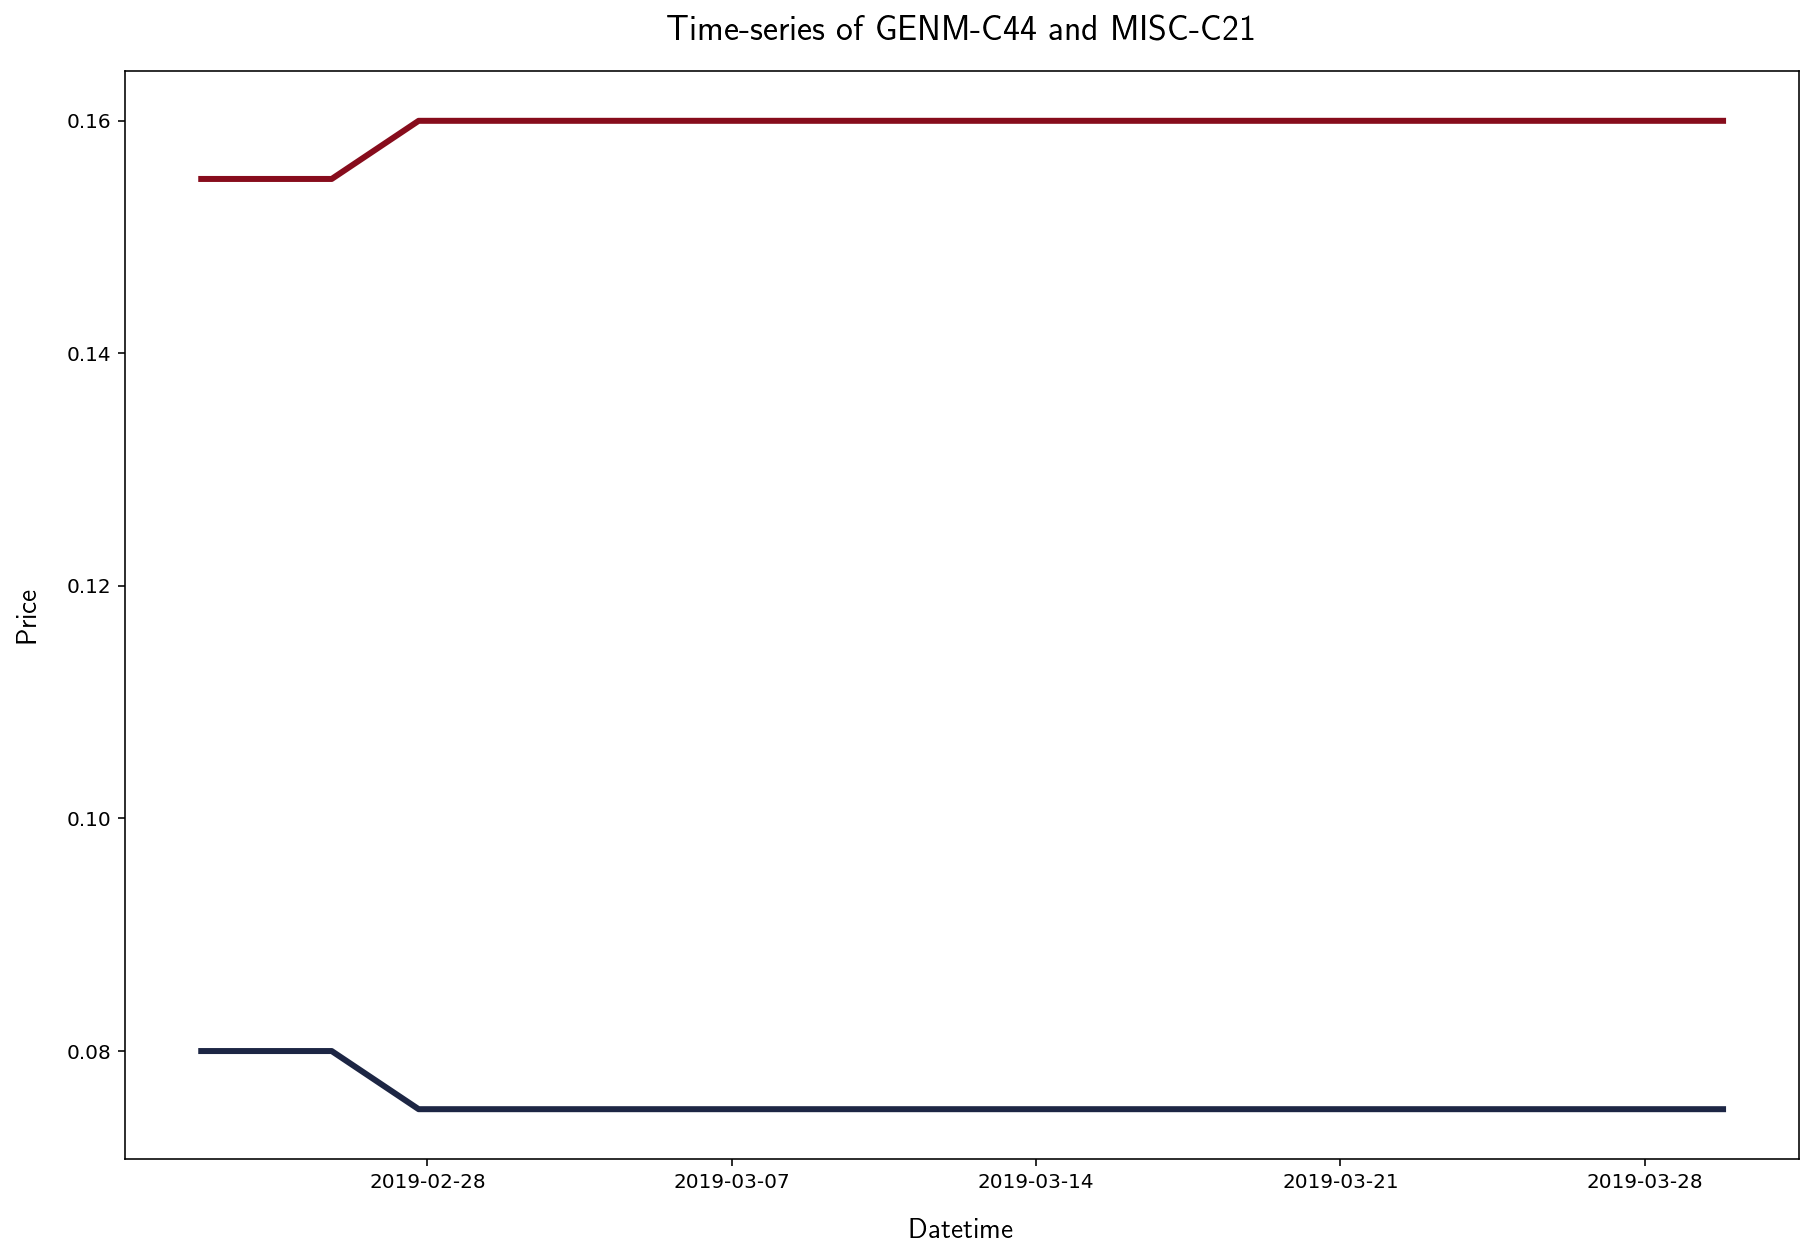

In [33]:
plt.figure(figsize=(15, 10))
plt.xlabel('Datetime', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('Time-series of GENM-C44 and MISC-C21', pad=15, fontsize=18, usetex=True);
plt.plot(all_df['GENM-C44'], color='#1D2644', linewidth=3);
plt.plot(all_df['MISC-C21'], color='#870C1C', linewidth=3);

## Data Reduction with PAA and SAX
<br>
<img src='13.png' width=800px>

### Original Data

In [34]:
all_df

,DIALOG-C33,DIALOG-C35,DIALOG-C36,DIALOG-C37,DIALOG-C38,DIALOG-C39,DIALOG-C40,DIALOG-C41,DIGI,DIGI-C24,...,YTL,YTL-C22,YTLLAND,YTLPOWR,YTLPOWR-C5,YTLPOWR-C6,YTLREIT,ZECON,ZELAN,ZHULIAN
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-02-22 19:11:00,0.035,0.005,0.055,0.060,0.040,0.065,0.130,0.110,4.67,0.060,...,1.15,0.05,0.405,0.915,0.005,0.070,1.29,0.245,0.055,1.36
2019-02-25 19:11:00,0.035,0.005,0.055,0.065,0.040,0.070,0.135,0.115,4.71,0.060,...,1.14,0.05,0.405,0.905,0.005,0.070,1.29,0.250,0.055,1.36
2019-02-27 19:11:00,0.025,0.005,0.055,0.060,0.040,0.060,0.125,0.110,4.66,0.060,...,1.11,0.05,0.410,0.910,0.005,0.070,1.30,0.245,0.055,1.36
2019-02-28 19:11:00,0.025,0.005,0.055,0.050,0.040,0.055,0.125,0.110,4.55,0.050,...,1.06,0.05,0.410,0.890,0.005,0.060,1.29,0.225,0.055,1.37
2019-03-01 19:11:00,0.025,0.005,0.055,0.045,0.040,0.055,0.115,0.105,4.56,0.040,...,1.02,0.05,0.395,0.860,0.005,0.055,1.28,0.230,0.070,1.36
2019-03-04 13:06:00,0.025,0.005,0.055,0.045,0.040,0.055,0.120,0.105,4.56,0.045,...,1.05,0.05,0.390,0.865,0.005,0.055,1.28,0.240,0.080,1.36
2019-03-04 19:11:00,0.025,0.005,0.055,0.045,0.040,0.055,0.120,0.105,4.58,0.055,...,1.03,0.05,0.400,0.860,0.005,0.055,1.28,0.225,0.080,1.37
2019-03-05 13:06:00,0.025,0.005,0.055,0.045,0.040,0.050,0.120,0.100,4.60,0.045,...,1.04,0.05,0.400,0.860,0.005,0.055,1.28,0.235,0.085,1.37
2019-03-05 19:11:00,0.020,0.005,0.055,0.045,0.040,0.050,0.120,0.105,4.56,0.045,...,1.02,0.05,0.400,0.860,0.005,0.055,1.27,0.230,0.085,1.36


### Data Reduction with PAA then SAX

In [35]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation

In [36]:
dataset = all_df['DIGI'].values
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
dataset = scaler.fit_transform(dataset)

#### PAA transform (and inverse transform) of the data

In [37]:
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))

#### SAX transform

In [38]:
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))

#### Original Data Plot

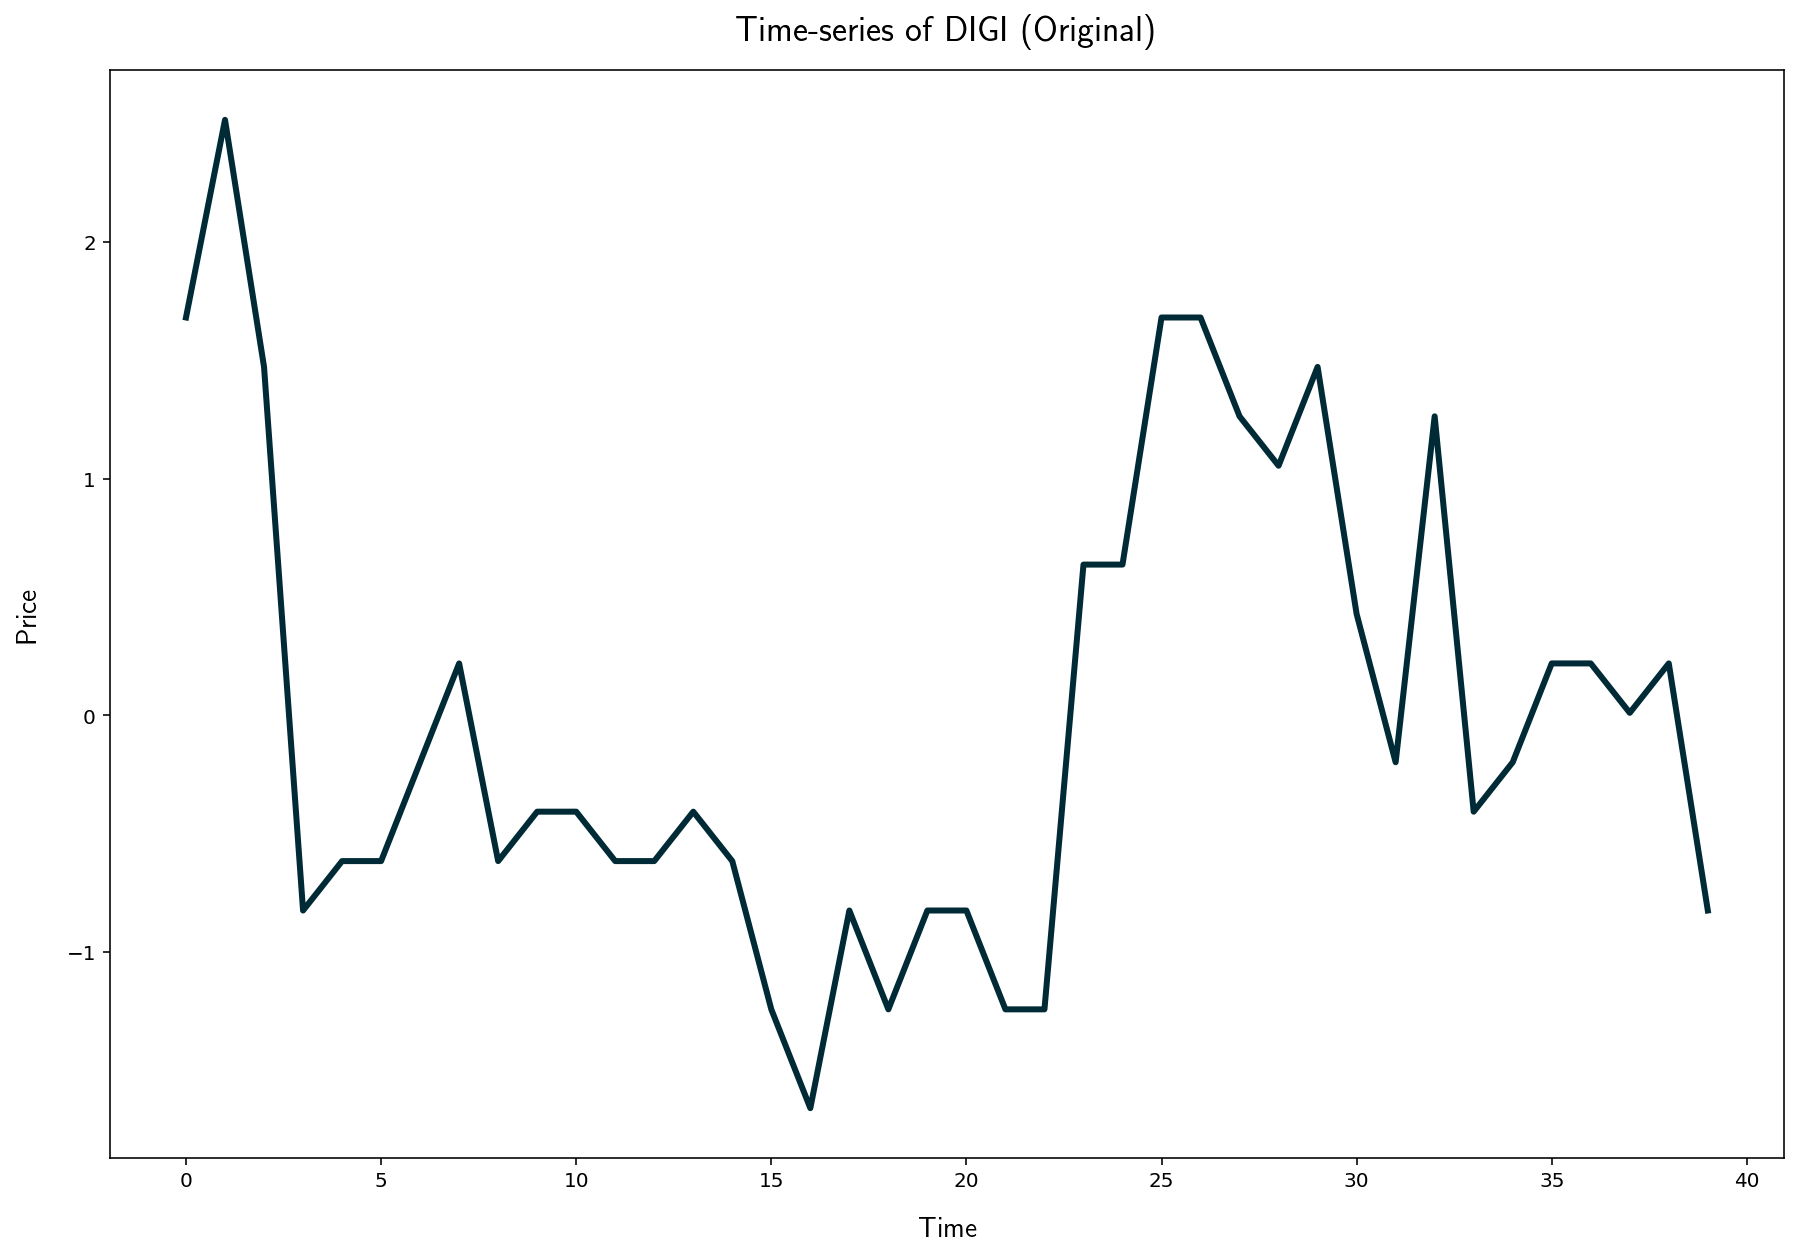

In [39]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('Time-series of DIGI (Original)', pad=15, fontsize=18, usetex=True);
plt.plot(dataset.flatten(), color='#002b36', linewidth=3);

#### PAA Plot

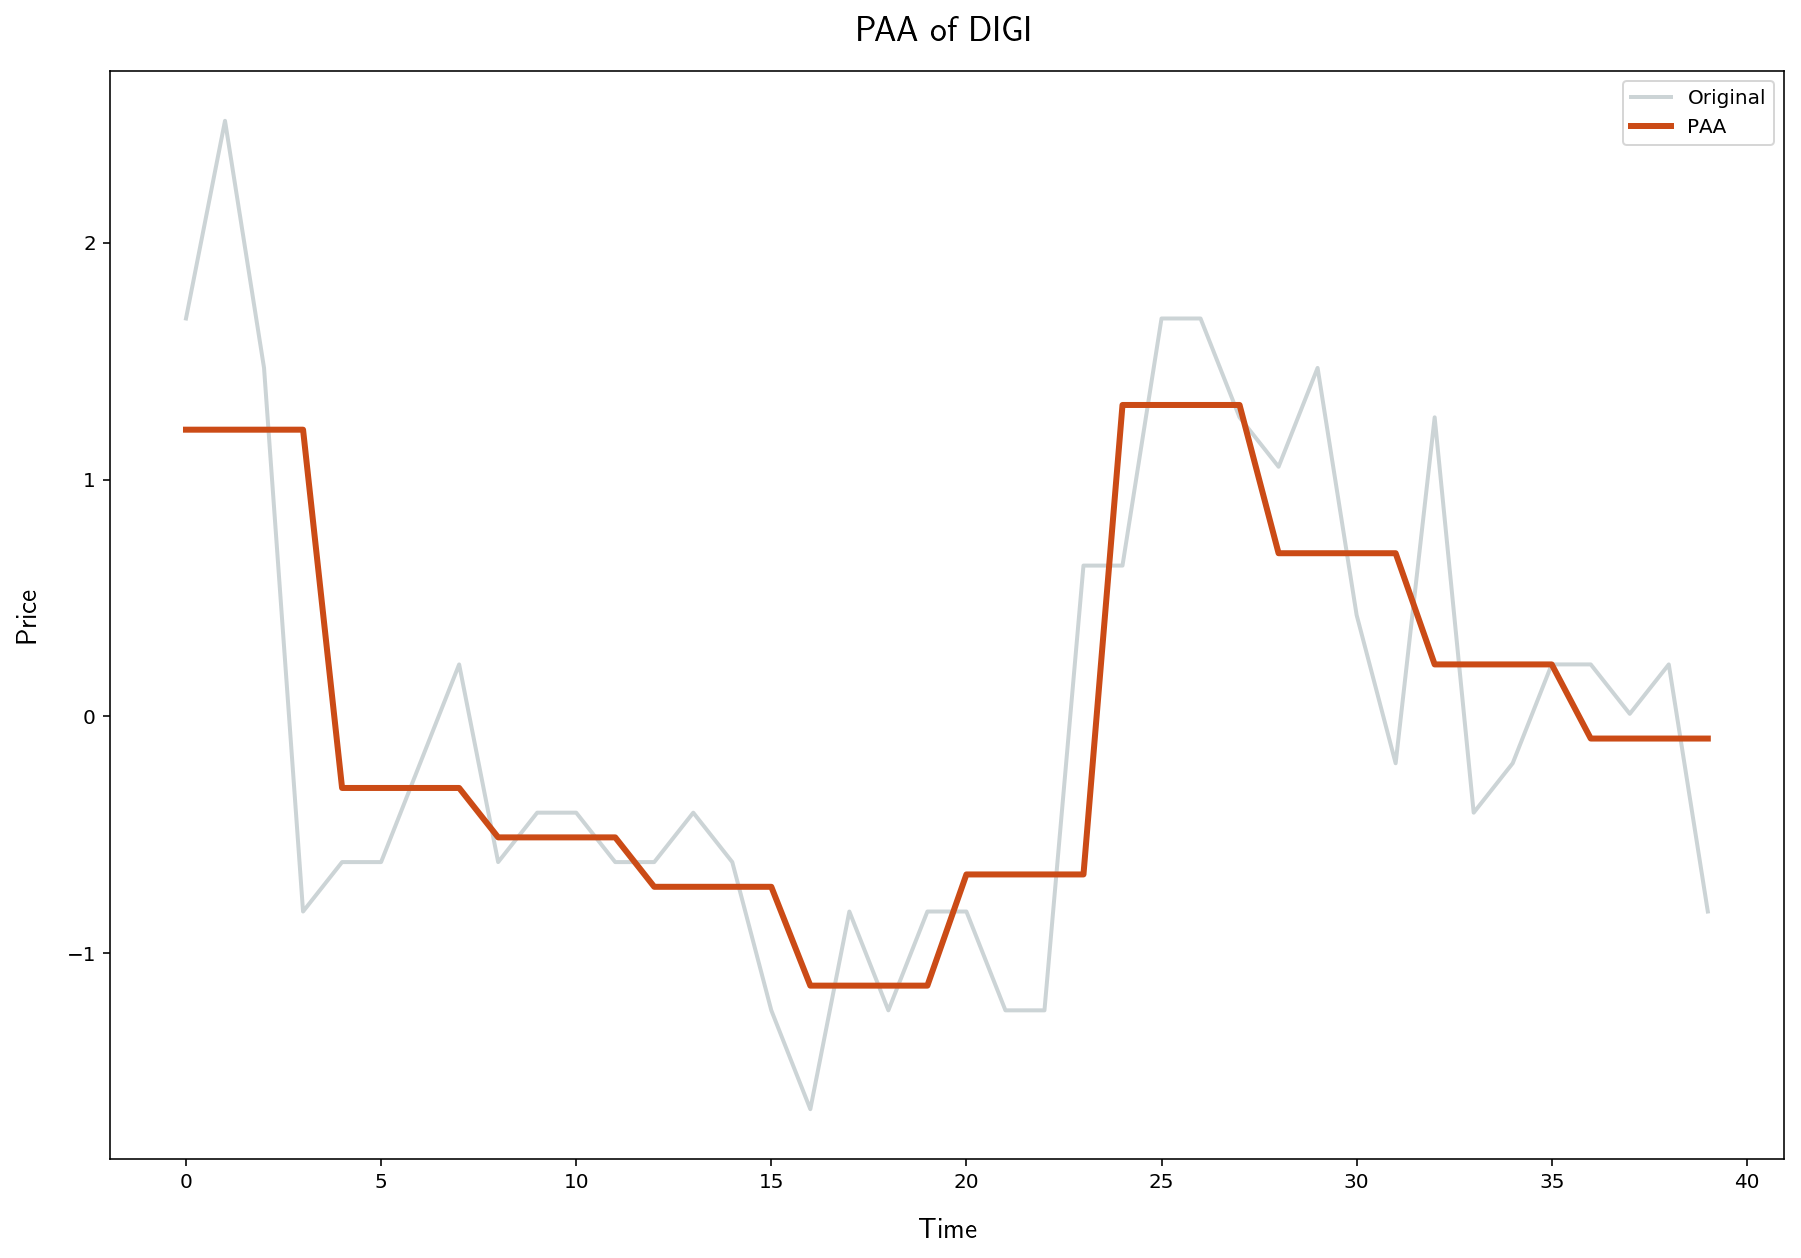

In [40]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('PAA of DIGI', pad=15, fontsize=18, usetex=True);
plt.plot(dataset.flatten(), color='#002b36', linewidth=2, alpha=0.2, label='Original');
plt.plot(paa_dataset_inv.flatten(), color='#cb4b16', linewidth=3, label='PAA');
plt.legend();

#### SAX Plot

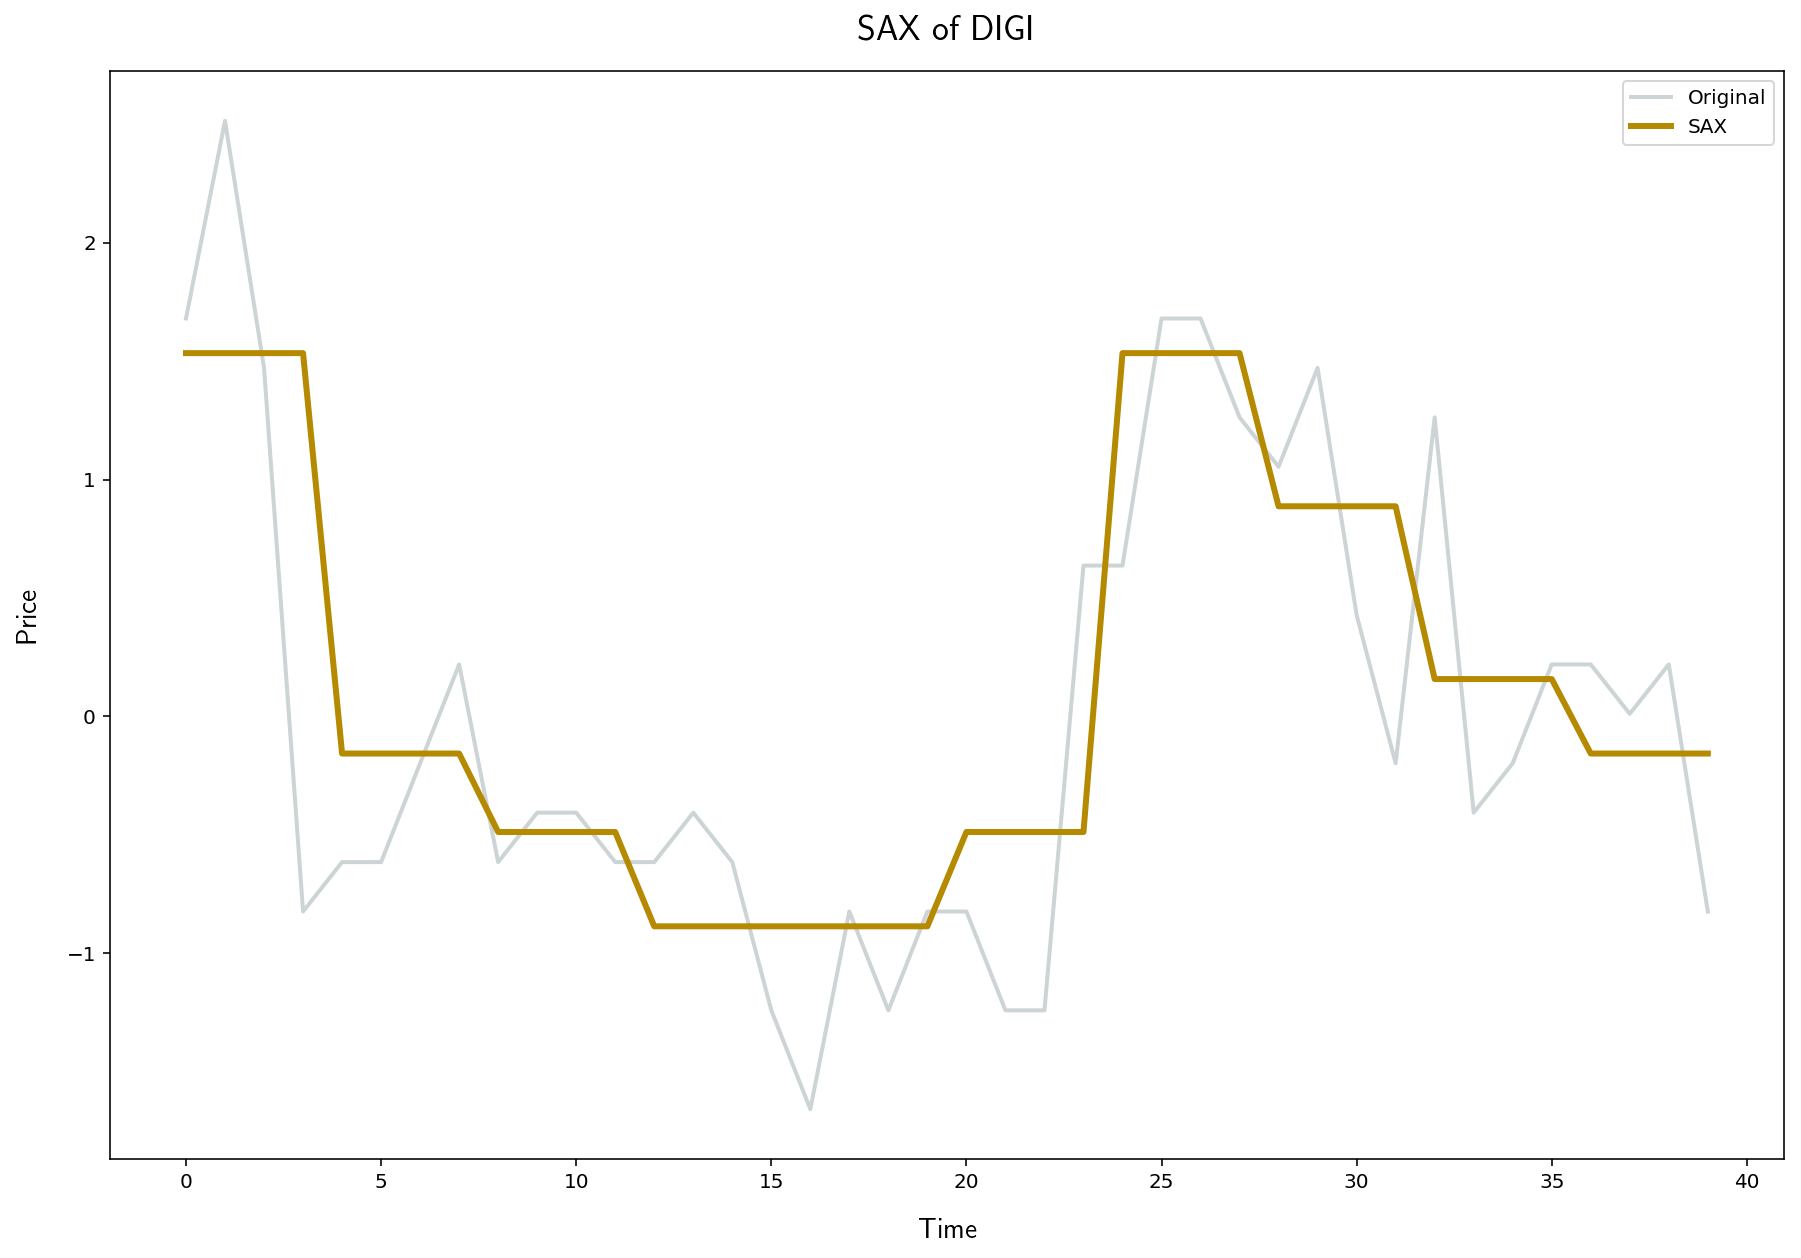

In [41]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('SAX of DIGI', pad=15, fontsize=18, usetex=True);
plt.plot(dataset.flatten(), color='#002b36', linewidth=2, alpha=0.2, label='Original');
plt.plot(sax_dataset_inv.flatten(), color='#b58900', linewidth=3, label='SAX');
plt.legend();

#### PAA and SAX Together

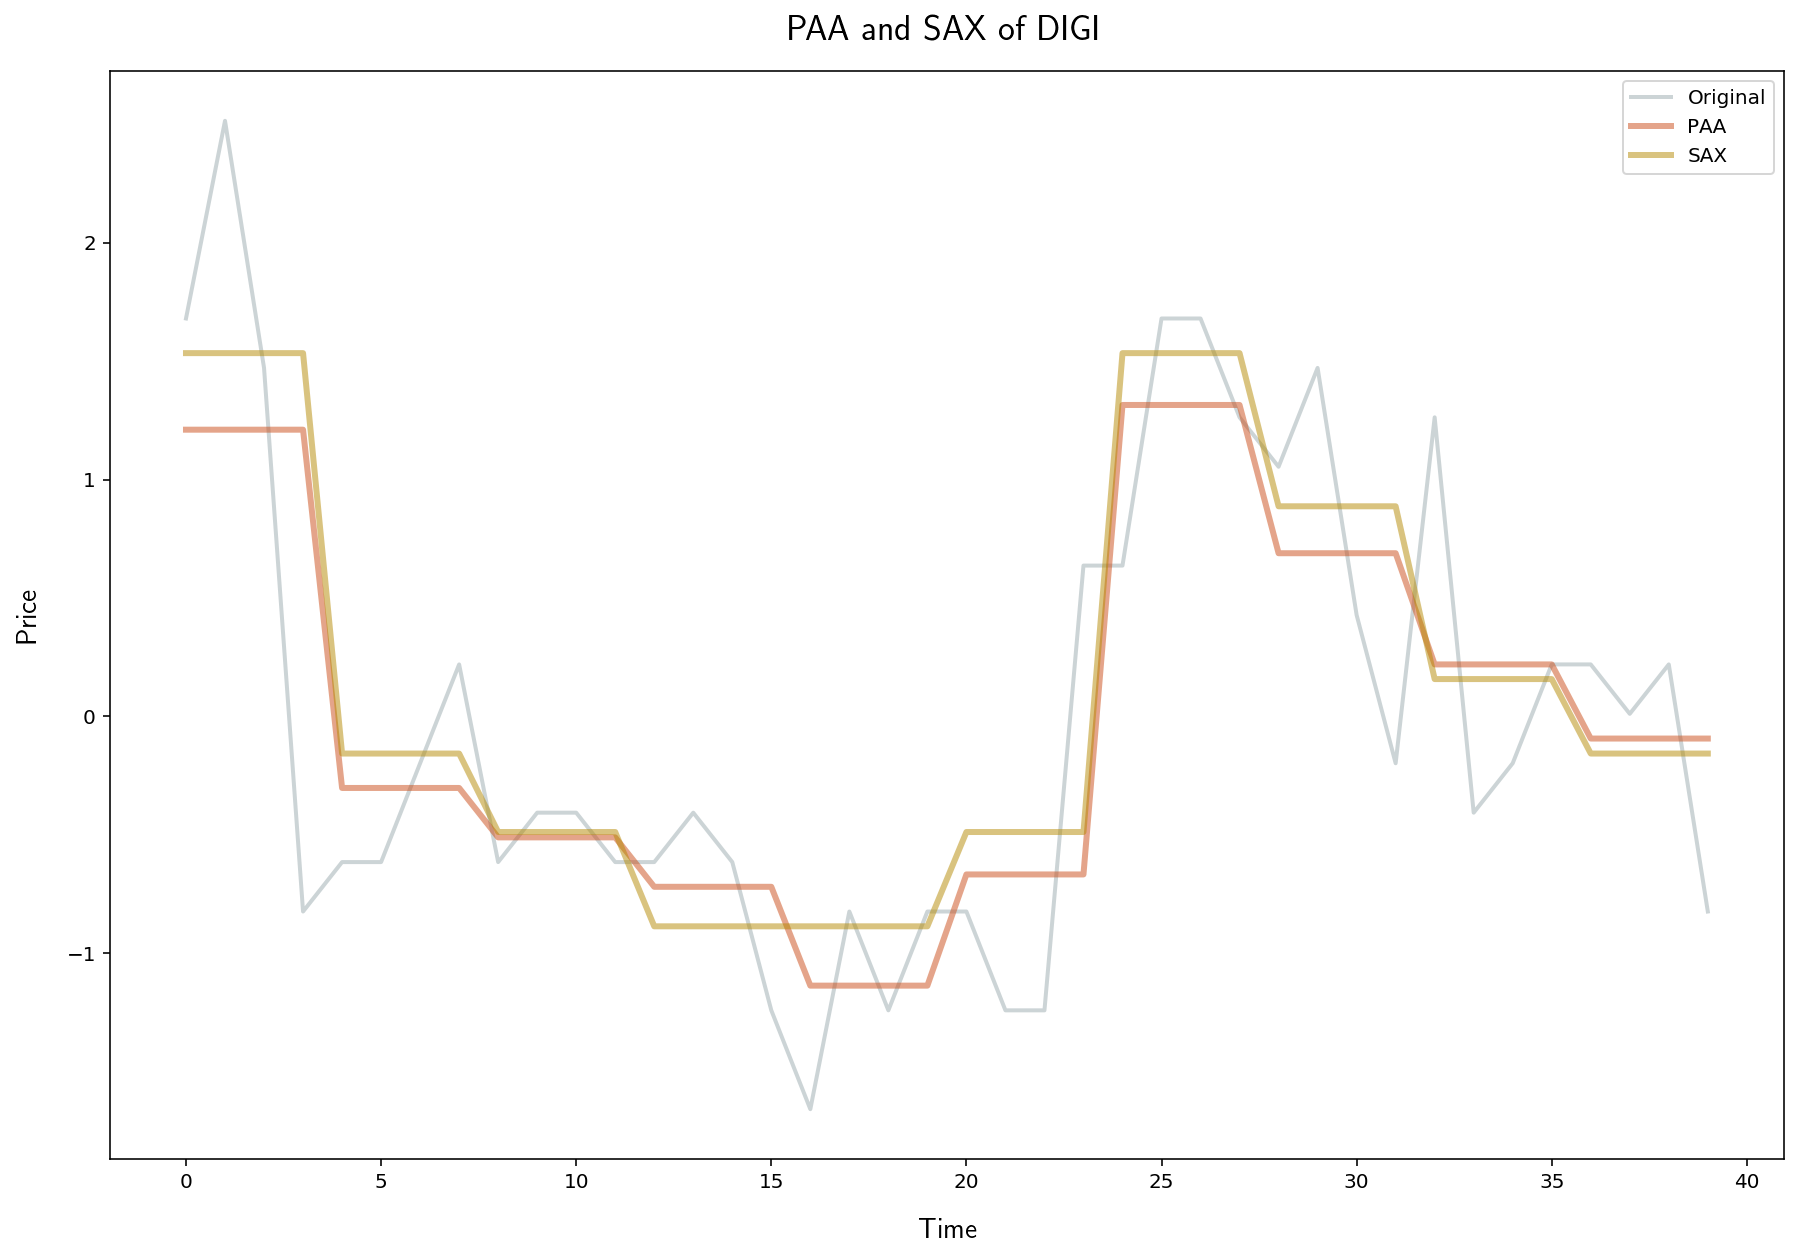

In [42]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time', labelpad=12, fontsize=14, usetex=True);
plt.ylabel('Price', labelpad=12, fontsize=14, usetex=True);
plt.title('PAA and SAX of DIGI', pad=15, fontsize=18, usetex=True);
plt.plot(dataset.flatten(), color='#002b36', linewidth=2, alpha=0.2, label='Original');
plt.plot(paa_dataset_inv.flatten(), color='#cb4b16', linewidth=3, alpha=0.5, label='PAA');
plt.plot(sax_dataset_inv.flatten(), color='#b58900', linewidth=3, alpha=0.5, label='SAX');
plt.legend();

#### Applying SAX to All Companies in the Dataframe

In [43]:
sax_df = pd.DataFrame({})
for col in all_df.columns:
    dataset = all_df[col].values
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
    dataset = scaler.fit_transform(dataset)
    n_paa_segments = 10
    paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
    paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))
    n_sax_symbols = 8
    sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
    sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))
    sax_df[col] = sax_dataset_inv.flatten()

In [46]:
sax_df

,DIALOG-C33,DIALOG-C35,DIALOG-C36,DIALOG-C37,DIALOG-C38,DIALOG-C39,DIALOG-C40,DIALOG-C41,DIGI,DIGI-C24,...,YTL,YTL-C22,YTLLAND,YTLPOWR,YTLPOWR-C5,YTLPOWR-C6,YTLREIT,ZECON,ZELAN,ZHULIAN
0,1.534121,0.157311,0.887147,1.534121,0.887147,1.534121,1.534121,1.534121,1.534121,1.534121,...,1.534121,0.157311,1.534121,1.534121,0.157311,1.534121,1.534121,-0.887147,-1.534121,-0.488776
1,1.534121,0.157311,0.887147,1.534121,0.887147,1.534121,1.534121,1.534121,1.534121,1.534121,...,1.534121,0.157311,1.534121,1.534121,0.157311,1.534121,1.534121,-0.887147,-1.534121,-0.488776
2,1.534121,0.157311,0.887147,1.534121,0.887147,1.534121,1.534121,1.534121,1.534121,1.534121,...,1.534121,0.157311,1.534121,1.534121,0.157311,1.534121,1.534121,-0.887147,-1.534121,-0.488776
3,1.534121,0.157311,0.887147,1.534121,0.887147,1.534121,1.534121,1.534121,1.534121,1.534121,...,1.534121,0.157311,1.534121,1.534121,0.157311,1.534121,1.534121,-0.887147,-1.534121,-0.488776
4,1.534121,0.157311,0.887147,0.157311,0.887147,0.488776,0.488776,0.887147,-0.157311,0.488776,...,-1.534121,0.157311,0.488776,-0.157311,0.157311,0.157311,0.488776,-1.534121,-0.488776,-0.157311
5,1.534121,0.157311,0.887147,0.157311,0.887147,0.488776,0.488776,0.887147,-0.157311,0.488776,...,-1.534121,0.157311,0.488776,-0.157311,0.157311,0.157311,0.488776,-1.534121,-0.488776,-0.157311
6,1.534121,0.157311,0.887147,0.157311,0.887147,0.488776,0.488776,0.887147,-0.157311,0.488776,...,-1.534121,0.157311,0.488776,-0.157311,0.157311,0.157311,0.488776,-1.534121,-0.488776,-0.157311
7,1.534121,0.157311,0.887147,0.157311,0.887147,0.488776,0.488776,0.887147,-0.157311,0.488776,...,-1.534121,0.157311,0.488776,-0.157311,0.157311,0.157311,0.488776,-1.534121,-0.488776,-0.157311
8,0.157311,0.157311,0.887147,0.157311,0.887147,-0.488776,0.887147,0.488776,-0.488776,0.488776,...,-1.534121,0.157311,0.157311,0.488776,0.157311,0.157311,-0.488776,-0.488776,0.157311,-0.887147
9,0.157311,0.157311,0.887147,0.157311,0.887147,-0.488776,0.887147,0.488776,-0.488776,0.488776,...,-1.534121,0.157311,0.157311,0.488776,0.157311,0.157311,-0.488776,-0.488776,0.157311,-0.887147


In [48]:
sax_df['DIGI'].drop_duplicates()

0     1.534121
4    -0.157311
8    -0.488776
12   -0.887147
28    0.887147
32    0.157311
Name: DIGI, dtype: float64

## Data Reduction with PCA

In [49]:
df.head()

,Datetime,CompanySymbol,OpenPrice,HighPrice,LowPrice,LastPrice
0,13 Mar 2019 - 7:13 PM,3A,0.850,0.855,0.845,0.850
1,13 Mar 2019 - 7:13 PM,A50CHIN-C22,0.140,0.145,0.120,0.135
2,13 Mar 2019 - 7:13 PM,A50CHIN-C24,0.670,0.670,0.670,0.670
3,13 Mar 2019 - 7:13 PM,A50CHIN-C26,0.000,0.000,0.000,0.430
4,13 Mar 2019 - 7:13 PM,A50CHIN-C28,0.225,0.225,0.210,0.220


In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Scaling the Data

In [51]:
standard_df = StandardScaler().fit_transform(df[['OpenPrice', 'HighPrice', 'LowPrice', 'LastPrice']])

#### Calculating the Principal Components

In [52]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standard_df)
principals_df = pd.DataFrame(principal_components, columns=
                      ['PrincipalComponent1', 'PrincipalComponent2'])

#### Producing the Final Dataframe

In [53]:
pca_df = pd.concat([df[['Datetime', 'CompanySymbol']], principals_df], axis=1)
pca_df.head()

,Datetime,CompanySymbol,PrincipalComponent1,PrincipalComponent2
0,13 Mar 2019 - 7:13 PM,3A,-0.007068,-0.064470
1,13 Mar 2019 - 7:13 PM,A50CHIN-C22,-0.298169,-0.048580
2,13 Mar 2019 - 7:13 PM,A50CHIN-C24,-0.080345,-0.060473
3,13 Mar 2019 - 7:13 PM,A50CHIN-C26,-0.326293,0.012877
4,13 Mar 2019 - 7:13 PM,A50CHIN-C28,-0.263558,-0.050471
